# Data driven credit card fraud detection
Number total of transactions: 284,807
Number of frauds: 492
Number of features: 31 (30 independents and 1 dependent)
Unbalanced: fraud represents only 0.172% of total transactions
Only numeric input variables: adapted by PCA transformation


Importing the libraries

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score

from termcolor import colored as cl # text customization
from sklearn.svm import SVC # SVM algorithm
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.preprocessing import StandardScaler, RobustScaler
import itertools # advanced tools

# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
# for visualizing
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.ensemble import IsolationForest


Connecting collab to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data from drive

In [ ]:
df = pd.read_csv('/content/drive/My Drive/creditcard.csv')

# EDA

Shape of the data

In [ ]:
df.shape

(284807, 31)

Explanation of the datset

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print(df.isnull().any())

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [ ]:
df.head().style.set_properties(**{"background-color":"white",
                           "color" : "black"})

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [ ]:
print(*df.columns, sep = ", ")

Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class


In [ ]:
df[['Time', 'Amount']].describe().style.set_properties(**{"background-color":"white",
                           "color" : "black"})

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [ ]:
# Descriptive statistics of  of frauds transactions
#Mean transaction is around 122 and standard deviation is around 256.
# Maximum Transaction was 2125 and minimum was 0.
summary = (df[df['Class'] == 1].describe().transpose().reset_index())
summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

summary

,feature,count,mean,std,min,25%,50%,75%,max
0,Time,492.0,80746.807,47835.365,406.000,41241.500,75568.500,128483.000,170348.000
1,V1,492.0,-4.772,6.784,-30.552,-6.036,-2.342,-0.419,2.132
2,V2,492.0,3.624,4.291,-8.402,1.188,2.718,4.971,22.058
3,V3,492.0,-7.033,7.111,-31.104,-8.643,-5.075,-2.276,2.250
4,V4,492.0,4.542,2.873,-1.313,2.373,4.177,6.349,12.115
5,V5,492.0,-3.151,5.372,-22.106,-4.793,-1.523,0.215,11.095
6,V6,492.0,-1.398,1.858,-6.406,-2.502,-1.425,-0.413,6.474
7,V7,492.0,-5.569,7.207,-43.557,-7.965,-3.034,-0.946,5.803
8,V8,492.0,0.571,6.798,-41.044,-0.195,0.622,1.765,20.007
9,V9,492.0,-2.581,2.501,-13.434,-3.872,-2.209,-0.788,3.354


In [ ]:
#Mean transaction is around 88 and standard deviation is around 250.
# Maximum Transaction was 25691 and minimum was 0.
summary = (df[df['Class'] == 0].describe().transpose().reset_index())
summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)
val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]
print("Summary for NonFraud Transactions")
summary


Summary for NonFraud Transactions


,feature,count,mean,std,min,25%,50%,75%,max
0,Time,284315.0,94838.202,47484.016,0.000,54230.000,84711.000,139333.000,172792.000
1,V1,284315.0,0.008,1.930,-56.408,-0.918,0.020,1.316,2.455
2,V2,284315.0,-0.006,1.636,-72.716,-0.599,0.064,0.800,18.902
3,V3,284315.0,0.012,1.459,-48.326,-0.885,0.182,1.028,9.383
4,V4,284315.0,-0.008,1.399,-5.683,-0.850,-0.022,0.738,16.875
5,V5,284315.0,0.005,1.357,-113.743,-0.689,-0.053,0.612,34.802
6,V6,284315.0,0.002,1.330,-26.161,-0.767,-0.273,0.400,73.302
7,V7,284315.0,0.010,1.179,-31.765,-0.551,0.041,0.571,120.589
8,V8,284315.0,-0.001,1.161,-73.217,-0.209,0.022,0.326,18.709
9,V9,284315.0,0.004,1.089,-6.291,-0.640,-0.050,0.598,15.595


In [ ]:
# Percentages of fraudulent and non-fradulent transactions in data
print(f'Percent of Non-Fraudulent Transactions = {round(df["Class"].value_counts()[0]/len(df) * 100,3)}%')
print(f'Percent of Fraudulent Transactions = {round(df["Class"].value_counts()[1]/len(df) * 100,3)}%')

Percent of Non-Fraudulent Transactions = 99.827%
Percent of Fraudulent Transactions = 0.173%


In [ ]:
print('\n\033[1m  Fraudulent Transaction Distribution by amount \033[0m')
print("-"*50)
print(df[(df['Class'] == 1)]['Amount'].value_counts().head())


  Fraudulent Transaction Distribution by amount 
--------------------------------------------------
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Count of Non Fraud and Fraud are  [284315, 492]


Text(0.5, 1.0, 'Fraud & Not Fraud')

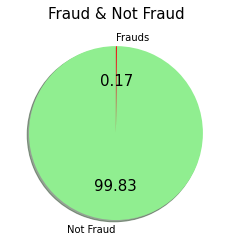

In [ ]:
fraud_or_not = df["Class"].value_counts().tolist()
labels = ['Not Fraud','Frauds']
values = [fraud_or_not[0], fraud_or_not[1]]
print('Count of Non Fraud and Fraud are ',values)
colors = ['lightgreen', 'red']
fix, ax1 = plt.subplots()
# the autopct is to get the percentage values.
_, texts, autotexts = ax1.pie(values, labels=labels, colors=colors, startangle = 90,shadow=True, autopct='%.2f')
list(map(lambda x:x.set_fontsize(15), autotexts))
ax1.set_title("Fraud & Not Fraud", fontsize=15)

Correlation of Variables with Class


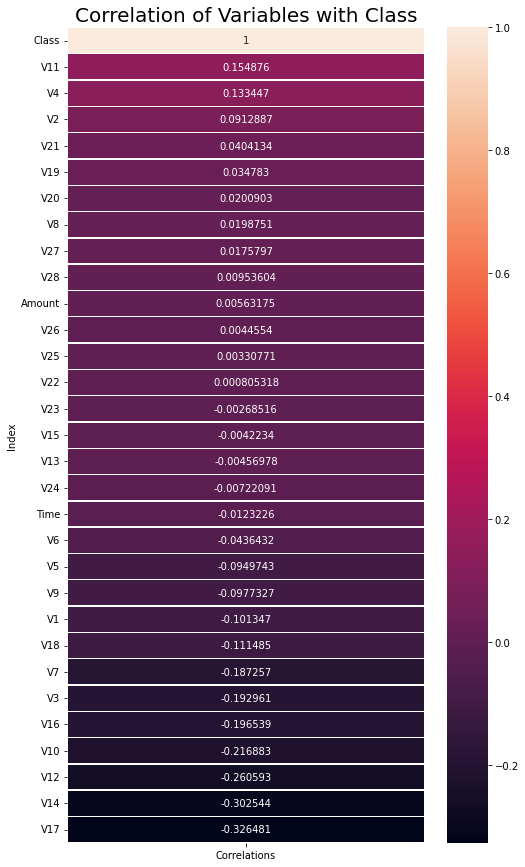

In [ ]:
corr = df.corrwith(df['Class']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(8, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", linewidths=0.4)
plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

Correlation of Variables with each other

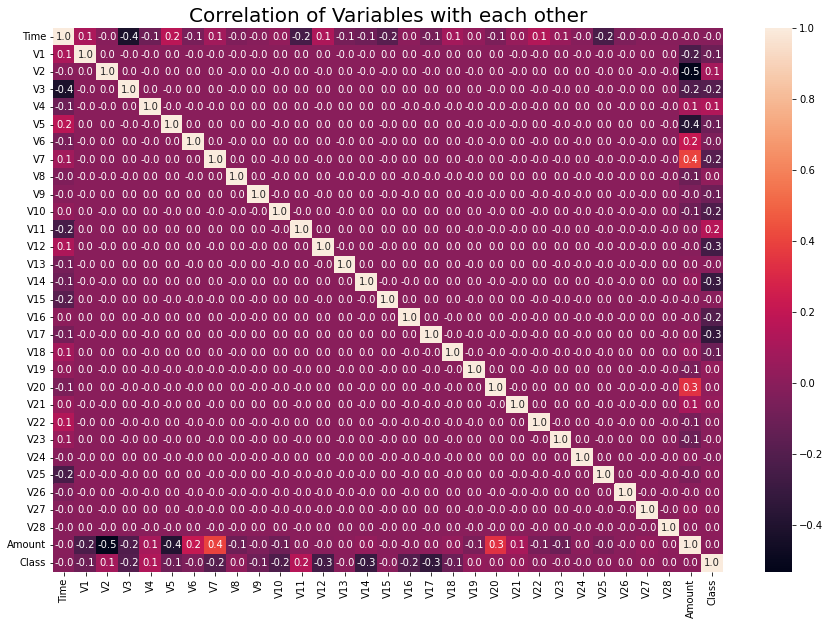

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Correlation of Variables with each other", fontsize=20 )
sns.heatmap(df.corr(), annot = True, fmt = '.1f' )

In [ ]:
# shuffles the data before undersample
# to understand better the relation between variables 
df = df.sample(frac=1)
# Takes 492 of non-fraud rows
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
# Creating a new dataframe with 50:50 ratio of fraud:non-fraud
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shufffle the new dataframe
new_df = normal_distributed_df.sample(frac=1, random_state=42)


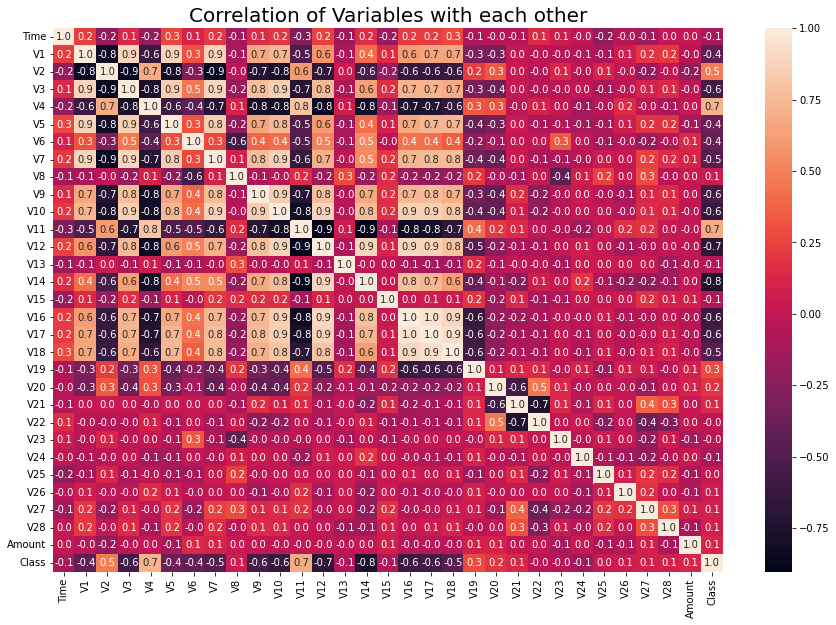

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Correlation of Variables with each other", fontsize=20 )
sns.heatmap(new_df.corr(), annot = True, fmt = '.1f' )

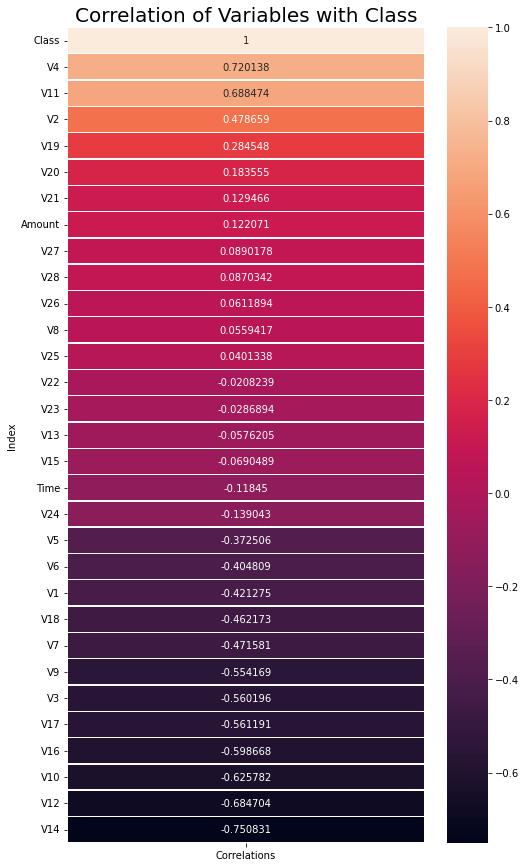

In [ ]:
corr = new_df.corrwith(df['Class']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(8, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", linewidths=0.4)
plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

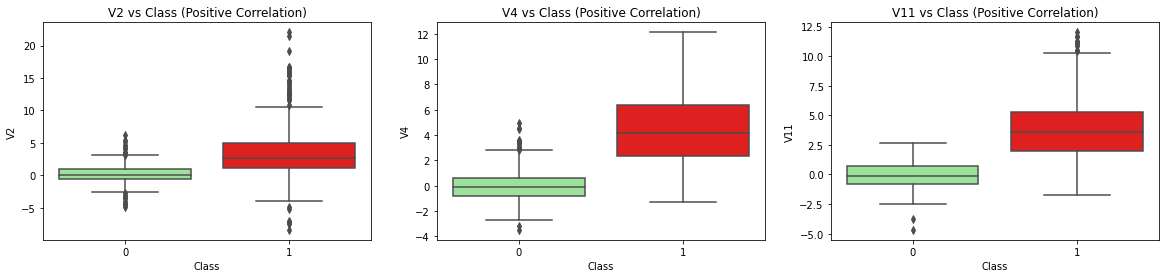

In [ ]:
''''
We can see that the features selected here have a statistically higher value when there is a fraudulent transaction. We don't know what these features actually mean, but we (at least) 
have somewhat of an understanding of their correlation with the class. 
This can be very useful when we are further preparing our dataset for our model.
'''
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Creating the boxplot
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Class (Positive Correlation)')



plt.show()

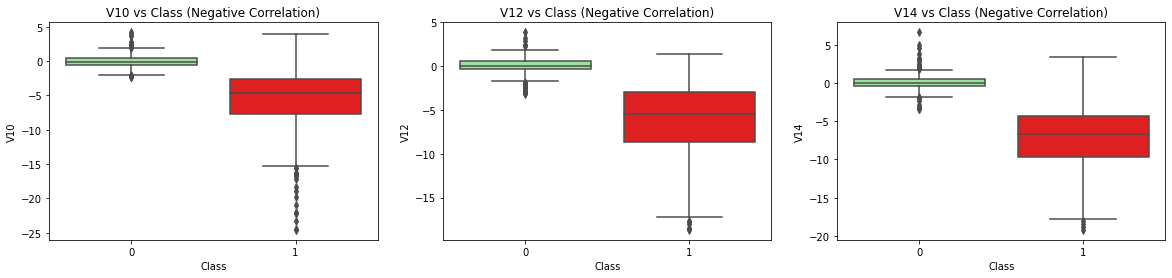

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))
# Creating the boxplot (negative correlation)
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V10 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V14 vs Class (Negative Correlation)')

plt.show()

T-SNE

In [ ]:
# let's update our inputs and outputs
standard_scaler = StandardScaler()
X = new_df.drop('Class', axis=1)
y = new_df['Class']
#Scale features to improve the training ability of TSNE.
X_Scaled = standard_scaler.fit_transform(X.values)

# t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=2).fit_transform(X_Scaled)


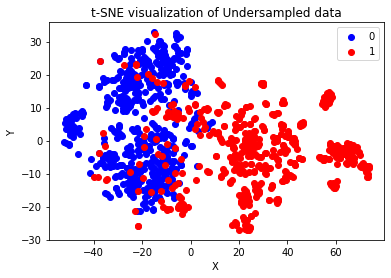

In [ ]:
#Most of the fraudulent transactions are well separated in the original dataset sample in this t-SNE plot, 
#while some are mixed within the rest of the data.
color_map = {1:'red', 0:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X_reduced_tsne[y==cl,0], 
                y=X_reduced_tsne[y==cl,1], 
                c=color_map[idx], 
                label=cl)
plt.xlabel('X ')
plt.ylabel('Y ')
plt.legend(loc='best')
plt.title('t-SNE visualization of Undersampled data')
plt.show()

Comparing Perameters with Number of Transactions

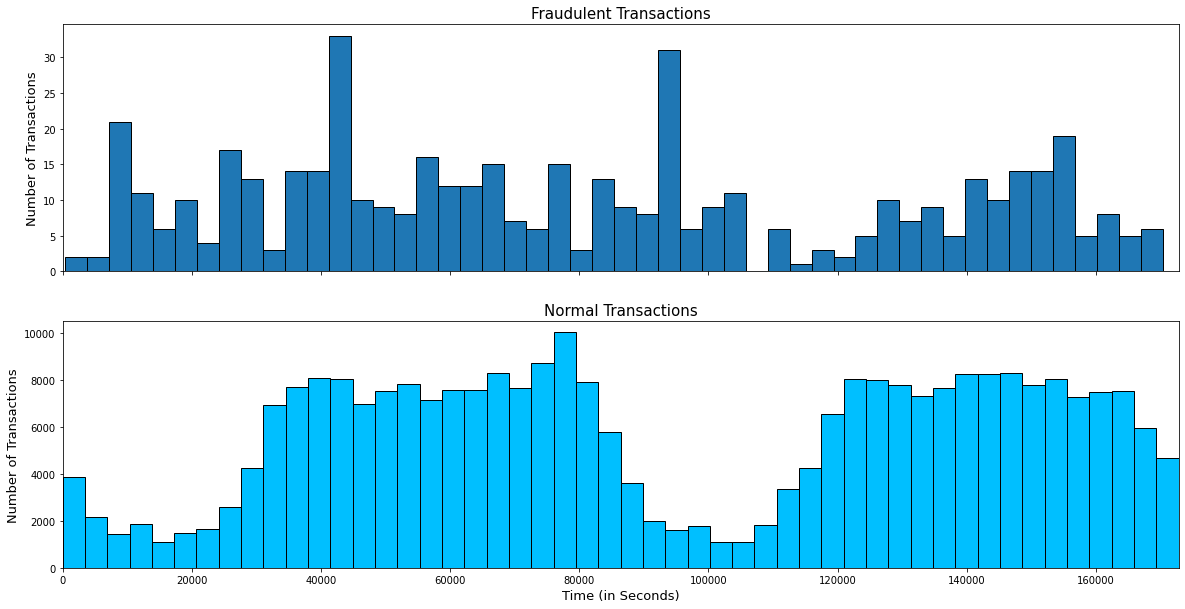

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

fraud_transactions = df.Time[df.Class == 1]
normal_transactions = df.Time[df.Class == 0]

ax1.hist(fraud_transactions, bins = 50, edgecolor="black")
ax1.set_xlim([min(fraud_transactions), max(fraud_transactions)])
ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, color='deepskyblue', edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Normal Transactions',  fontsize=15)

ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()

In [ ]:
# converting seconds to time delta to extract hours and mins

timedelta = pd.to_timedelta(df['Time'], unit='s')

df['mins'] = (timedelta.dt.components.minutes).astype(int)
df['hours'] = (timedelta.dt.components.hours).astype(int)

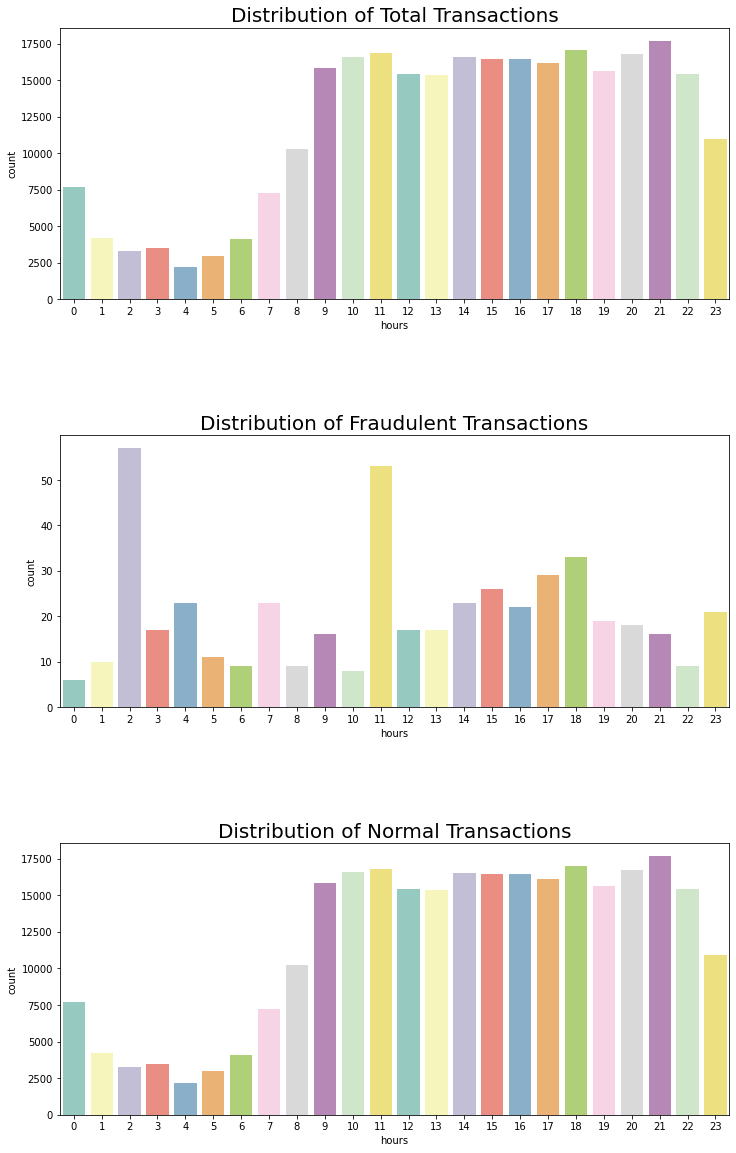

In [ ]:
# Countplots for hours vs count of transactions

fig, axs = plt.subplots(3, figsize=(12,20))

fig.subplots_adjust(hspace=.5)

sns.countplot(df['hours'], ax = axs[0], palette='Set3')
axs[0].set_title("Distribution of Total Transactions",fontsize=20)
axs[0].set_facecolor("white")

sns.countplot(df[(df['Class'] == 1)]['hours'], ax=axs[1],  palette='Set3')
axs[1].set_title("Distribution of Fraudulent Transactions", fontsize=20)
axs[1].set_facecolor('white')

sns.countplot(df[(df['Class'] == 0)]['hours'], ax=axs[2], palette='Set3')
axs[2].set_title("Distribution of Normal Transactions", fontsize=20)
axs[2].set_facecolor("white")

plt.show()

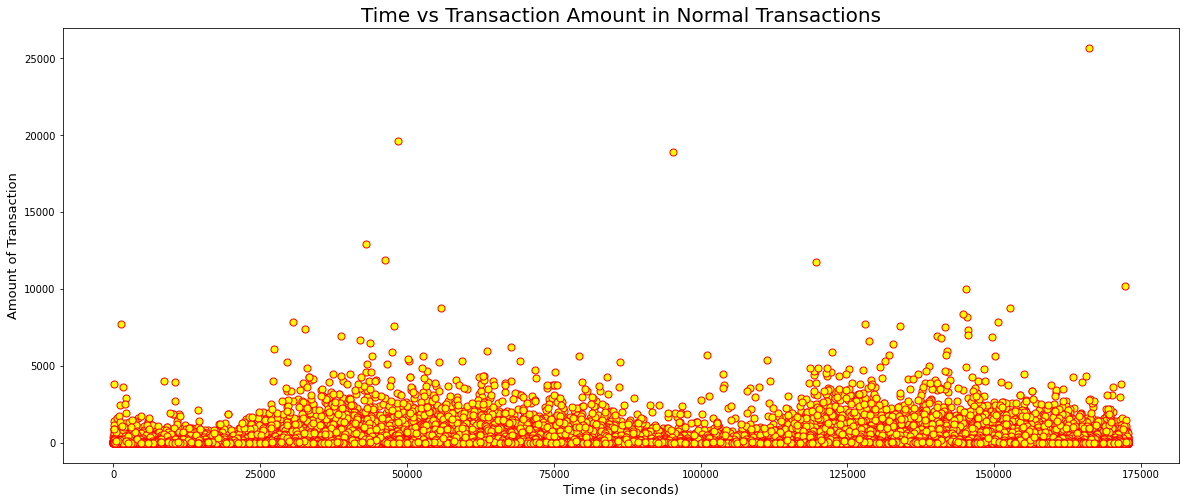

In [ ]:
#Class and Amount vs Time
# Scatter plot of Class vs Amount and Time for Normal Transactions 

plt.figure(figsize=(20,8))
fig = plt.scatter(x=df[df['Class'] == 0]['Time'], y=df[df['Class'] == 0]['Amount'], color="yellow", s=50, edgecolor='red')
plt.title("Time vs Transaction Amount in Normal Transactions", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()


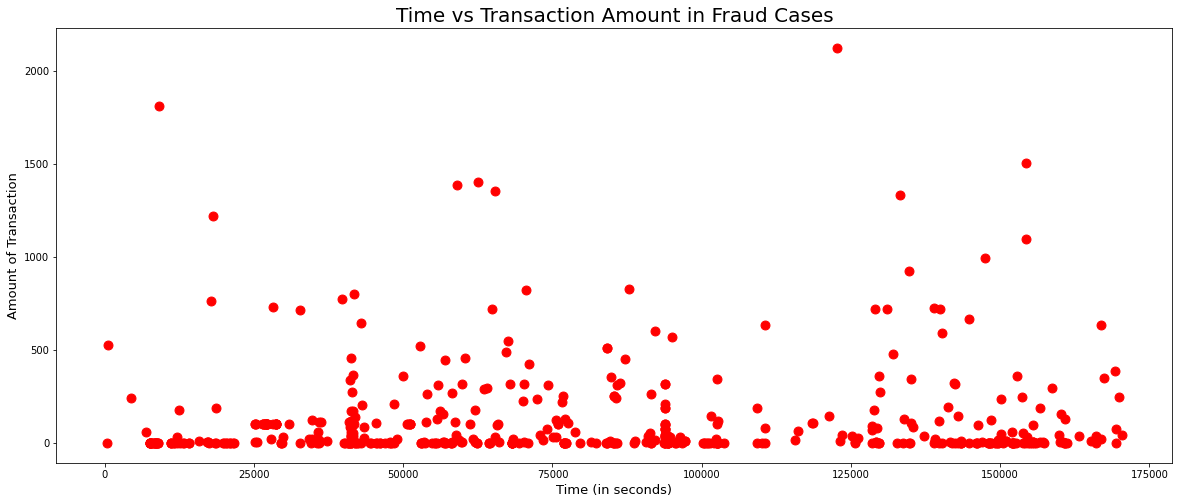

In [ ]:
# Scatter plot of Class vs Amount and Time for Fraudulent Transactions 

plt.figure(figsize=(20,8))
fig = plt.scatter(x=df[df['Class'] == 1]['Time'], y=df[df['Class'] == 1]['Amount'], color="r", s=80)
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

Looking the V's features

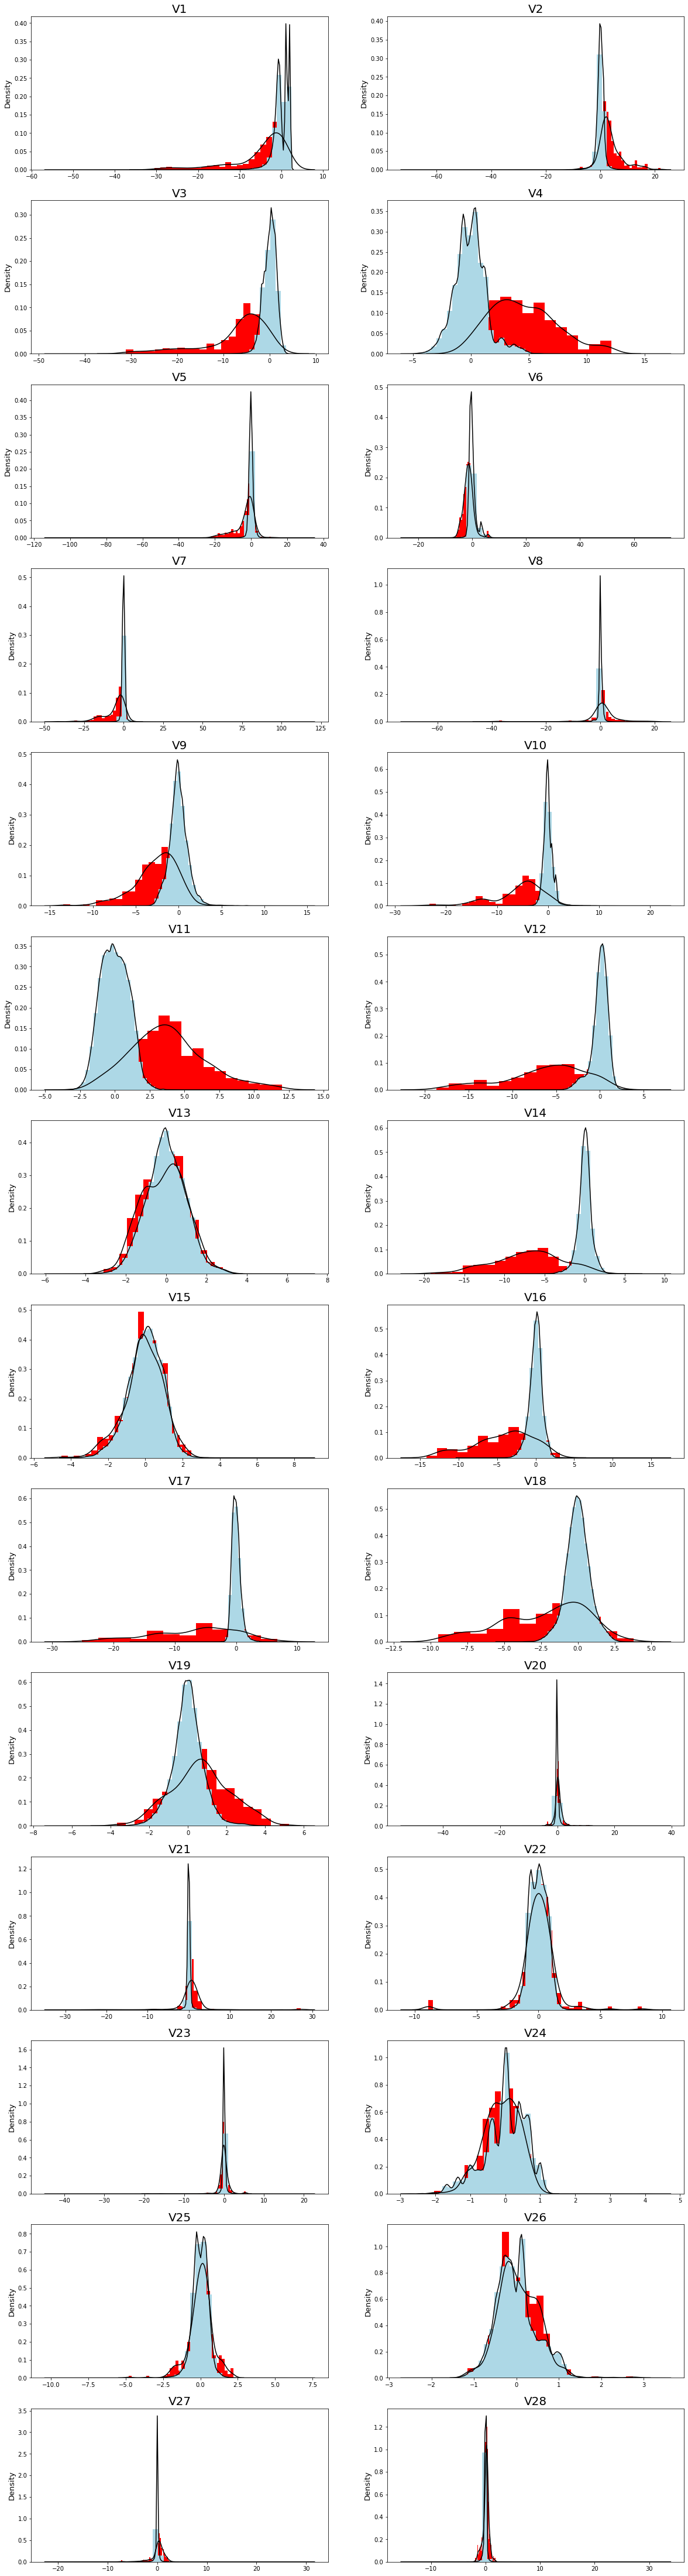

In [ ]:

columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], color='red', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(df[col][normals],color='lightblue', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()

In [ ]:
#Data Cleaning and Preprocessing
# Finding the 3rd and 1st Quantile for Amount Column
Q3 = np.percentile(df['Amount'], 75)
Q1 = np.percentile(df['Amount'], 25)

# setting the cutoff
cutoff = 7.0
# computing the interquartile range
IQR = (Q3 - Q1)

# computing lower bound and upper bound
lower_bound = Q1 - (IQR * cutoff)
upper_bound = Q3 + (IQR * cutoff)

# creating a filter to remove values less than lower bound and greater than
# upper bound
filter_data = (df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)

# filtering data
outliers = df[filter_data]['Amount']
fraud_outliers = df[(df['Class'] == 1) & filter_data]['Amount']
normal_outliers = df[(df['Class'] == 0) & filter_data]['Amount']

print(f"Total Number of Outliers : {outliers.count()}")
print(f"Number of Outliers in Fraudulent Class : {fraud_outliers.count()}")
print(f"No of Outliers in Normal Class : {normal_outliers.count()}")
print(f"Percentage of Fraud amount outliers : {round((fraud_outliers.count()/outliers.count())*100,2)}%")

Total Number of Outliers : 7478
Number of Outliers in Fraudulent Class : 29
No of Outliers in Normal Class : 7449
Percentage of Fraud amount outliers : 0.39%


In [ ]:
data = df.drop(outliers.index)
data.reset_index(inplace=True, drop=True)

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,mins,hours
0,115960.0,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,...,0.055476,0.085934,-0.457265,0.126185,0.214236,0.067386,1.79,0,12,8
1,138396.0,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,...,0.007543,-0.045930,0.086611,0.712647,-0.066077,-0.058296,5.74,0,26,14
2,58346.0,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,...,0.074944,0.194447,0.033323,-0.509168,-0.694157,-0.489850,5.67,0,12,16
3,78116.0,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,...,0.226603,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,126.00,0,41,21
4,11054.0,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,...,-0.056541,-0.104268,0.386347,-0.321959,0.002022,0.025594,15.95,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277324,67274.0,1.145484,-0.781774,0.488417,-0.859133,-0.543703,1.031799,-0.869260,0.403027,2.153869,...,-0.340819,-1.081764,0.825123,-0.393337,0.113609,0.009240,37.00,0,41,18
277325,14463.0,1.205584,-0.018865,0.851469,0.271141,-0.611746,-0.355526,-0.492331,-0.082980,1.680204,...,0.011242,0.113186,0.146389,1.059321,-0.070533,0.003090,14.95,0,1,4
277326,138850.0,1.823779,-0.790119,-0.079887,0.486926,-0.992713,0.013298,-0.943318,0.249591,1.273188,...,0.226039,-0.361329,-0.592829,0.166075,-0.015923,-0.039252,69.88,0,34,14
277327,48643.0,-3.729045,-3.345294,0.504541,1.349409,2.587102,-2.875825,-1.848069,0.775216,0.299077,...,0.036287,0.551506,-0.742764,0.095890,0.128720,-0.504839,12.31,0,30,13


In [ ]:
data.head().style.set_properties(**{"background-color":"white",
                           "color" : "black"})

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,mins,hours
0,115960.000000,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,-0.638497,0.539103,-0.138719,-1.166615,-0.608435,-0.740099,0.628549,0.105929,0.448800,0.133305,-0.041285,-0.321946,-0.859182,0.055476,0.085934,-0.457265,0.126185,0.214236,0.067386,1.790000,0,12,8
1,138396.000000,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,-0.250719,0.778779,-0.075154,-2.119390,-0.606401,-1.000264,0.067119,0.856625,0.587165,0.142988,-0.315038,0.101805,0.502895,0.007543,-0.045930,0.086611,0.712647,-0.066077,-0.058296,5.740000,0,26,14
2,58346.000000,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,1.157214,0.377390,1.326861,-1.034335,-0.217089,-1.949684,-1.368498,1.334146,-0.560265,1.398303,0.309719,-0.354588,-0.455957,0.074944,0.194447,0.033323,-0.509168,-0.694157,-0.489850,5.670000,0,12,16
3,78116.000000,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,-0.234947,-0.346110,-0.435490,0.866670,-0.785313,-0.436302,1.756455,-0.642086,-1.530292,-1.088577,0.334034,0.141367,0.139091,0.226603,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,126.000000,0,41,21
4,11054.000000,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,-0.002654,2.576528,-2.135597,2.817757,0.225021,-0.557112,1.783841,1.218295,-0.159246,0.534097,0.159146,-0.050360,0.029099,-0.056541,-0.104268,0.386347,-0.321959,0.002022,0.025594,15.950000,0,4,3


In [ ]:
data.shape

(277329, 33)

In [ ]:
# applying log transformation of Amount column

data['Amount'] = np.log(data['Amount'] + 0.001)

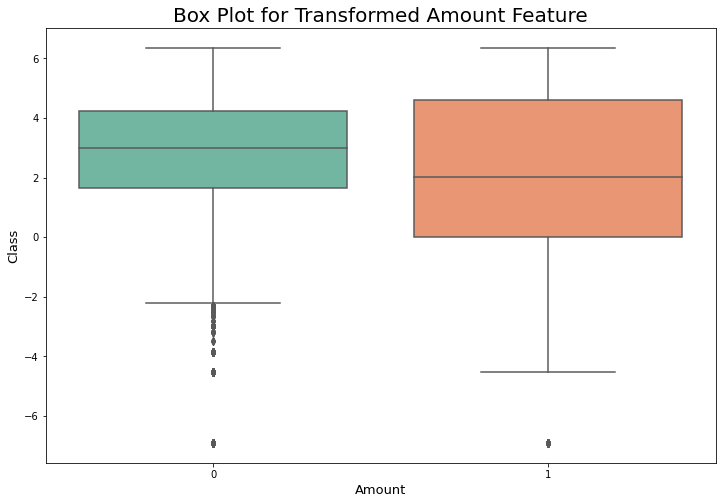

In [ ]:
# Box Plot for transformed Amount feature with class

plt.figure(figsize=(12,8))
sns.boxplot(x ="Class", y="Amount", data=data, palette='Set2');
plt.xlabel("Amount", fontsize=13)
plt.ylabel("Class", fontsize=13)
plt.title("Box Plot for Transformed Amount Feature", fontsize=20);

In [ ]:
to_model_cols = data.columns[0:30]
clf = IsolationForest(n_estimators=10, max_samples='auto', contamination=float(.0009), 
                      max_features=1.0, bootstrap=False, n_jobs=-1, random_state=12345, verbose=0)
clf.fit(data[to_model_cols])
pred = clf.predict(data[to_model_cols])
data['Class'] = pred
outliers = data.loc[data['Class']==-1]
outlier_index=list(outliers.index)

Number of anomalies and normal points (points classified as "-1" are anomalous

In [ ]:
print(data['Class'].value_counts())

 1    277080
-1       249
Name: Class, dtype: int64


Scaling the time column

In [ ]:
robust_scaler = RobustScaler()
data['Time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time,mins,hours
0,-0.996263,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,5.008105,1,1.783274,-0.994983,0,0
1,-0.996263,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,0.989913,1,-0.269825,-0.994983,0,0
2,-0.996251,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,5.936641,1,4.983721,-0.994972,0,0
3,-0.996251,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,4.816249,1,1.418291,-0.994972,0,0
4,-0.996239,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,4.248367,1,0.670579,-0.994960,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277324,1.034459,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.436807,0.250034,0.943651,0.823731,-0.260067,1,-0.296653,1.034951,59,23
277325,1.034471,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.606624,-0.395255,0.068472,-0.053527,3.210481,1,0.038986,1.034963,59,23
277326,1.034483,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.265745,-0.087371,0.004455,-0.026561,4.217756,1,0.641096,1.034975,59,23
277327,1.034483,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.569159,0.546668,0.108821,0.104533,2.302685,1,-0.167680,1.034975,59,23


Handling Class Imbalance

In [ ]:

X = data.drop(['Class','hours','mins'], 1)
Y = data.Class

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.366594,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,...,-0.041285,-0.321946,-0.859182,0.055476,0.085934,-0.457265,0.126185,0.214236,0.067386,0.582774
1,0.630280,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,...,-0.315038,0.101805,0.502895,0.007543,-0.045930,0.086611,0.712647,-0.066077,-0.058296,1.747633
2,-0.310533,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,...,0.309719,-0.354588,-0.455957,0.074944,0.194447,0.033323,-0.509168,-0.694157,-0.489850,1.735365
3,-0.078180,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,...,0.334034,0.141367,0.139091,0.226603,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,4.836290
4,-0.866347,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,...,0.159146,-0.050360,0.029099,-0.056541,-0.104268,0.386347,-0.321959,0.002022,0.025594,2.769522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277324,-0.205604,1.145484,-0.781774,0.488417,-0.859133,-0.543703,1.031799,-0.869260,0.403027,2.153869,...,-0.060065,0.043209,0.565356,-0.340819,-1.081764,0.825123,-0.393337,0.113609,0.009240,3.610945
277325,-0.826282,1.205584,-0.018865,0.851469,0.271141,-0.611746,-0.355526,-0.492331,-0.082980,1.680204,...,-0.092231,-0.035527,0.212023,0.011242,0.113186,0.146389,1.059321,-0.070533,0.003090,2.704778
277326,0.635616,1.823779,-0.790119,-0.079887,0.486926,-0.992713,0.013298,-0.943318,0.249591,1.273188,...,-0.134108,0.075700,0.139171,0.226039,-0.361329,-0.592829,0.166075,-0.015923,-0.039252,4.246794
277327,-0.424570,-3.729045,-3.345294,0.504541,1.349409,2.587102,-2.875825,-1.848069,0.775216,0.299077,...,0.889643,0.444018,-0.123563,0.036287,0.551506,-0.742764,0.095890,0.128720,-0.504839,2.510493


Original dataset vs Resampled Dataset

In [ ]:
print(f'Original dataset shape : {Counter(Y)}')
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, Y)
print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 277080, -1: 249})
Resampled dataset shape Counter({1: 277080, -1: 277080})


In [ ]:
y_res

0         1
1         1
2         1
3         1
4         1
         ..
554155   -1
554156   -1
554157   -1
554158   -1
554159   -1
Name: Class, Length: 554160, dtype: int64

In [ ]:
#Dimensionality Reduction and Clustering
# creating a random sample of 5000 points 
X_vis = X_res.sample(1000)
y_vis = y_res.sample(1000) 
print(X_vis.shape)
print(y_vis.shape)
y_vis

(1000, 30)
(1000,)


255118    1
92237     1
528358   -1
460015   -1
211816    1
         ..
242409    1
109819    1
423955   -1
180758    1
464455   -1
Name: Class, Length: 1000, dtype: int64

In [ ]:
y_res

0         1
1         1
2         1
3         1
4         1
         ..
554155   -1
554156   -1
554157   -1
554158   -1
554159   -1
Name: Class, Length: 554160, dtype: int64

In [ ]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146594,87771.0,-1.350426,1.390405,-0.167461,-2.662750,0.441095,-1.109427,0.836490,0.343835,0.413690,...,-0.326158,-0.959353,-0.035024,0.553007,0.052678,0.361641,0.302744,0.225979,1.00,0
46909,42985.0,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,-2.992092,...,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1
161968,114704.0,-0.940270,-0.105899,1.053156,-0.182287,0.423150,-0.790311,0.380002,-0.190759,-1.355259,...,-0.090910,0.336364,-0.631668,-0.013696,1.137620,-0.173641,-0.037815,-0.117793,62.00,0
208651,137211.0,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,-0.717418,...,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,39.45,1
63421,50706.0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6774,8528.0,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,...,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1.00,1
84543,60353.0,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,...,0.578984,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,454.82,1
140152,83569.0,0.975148,-0.435525,-1.485782,0.076614,2.091899,3.351847,-0.137473,0.720743,-0.173125,...,0.076385,-0.264479,-0.283245,1.012633,0.786117,-0.330769,-0.015467,0.042826,172.40,0
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1


In [ ]:
X_reduced_tsne = TSNE(n_components=2,
                      random_state=42 , 
                      verbose=2).fit_transform(X_vis.values)
                      

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.708681
[t-SNE] Computed conditional probabilities in 0.087s
[t-SNE] Iteration 50: error = 62.3618393, gradient norm = 0.2700375 (50 iterations in 0.493s)
[t-SNE] Iteration 100: error = 60.1954193, gradient norm = 0.2402890 (50 iterations in 0.396s)
[t-SNE] Iteration 150: error = 59.2635651, gradient norm = 0.2273580 (50 iterations in 0.402s)
[t-SNE] Iteration 200: error = 59.4396362, gradient norm = 0.2260049 (50 iterations in 0.405s)
[t-SNE] Iteration 250: error = 59.0743866, gradient norm = 0.2137973 (50 iterations in 0.416s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.074387
[t-SNE] Iteration 300: error = 0.6892751, gradient norm = 0.0007488 (50 iterations in 0.317s)
[t-SNE] Iteration 350: error = 0.6141629, gradient norm = 0.00030

In [ ]:
X_reduced_tsne

array([[ 14.077919 ,   7.5424986],
       [-28.975388 ,  31.206078 ],
       [-34.46293  , -35.13756  ],
       ...,
       [  9.761182 ,  -9.103675 ],
       [ 17.893183 ,   4.865453 ],
       [-25.2198   , -12.656076 ]], dtype=float32)

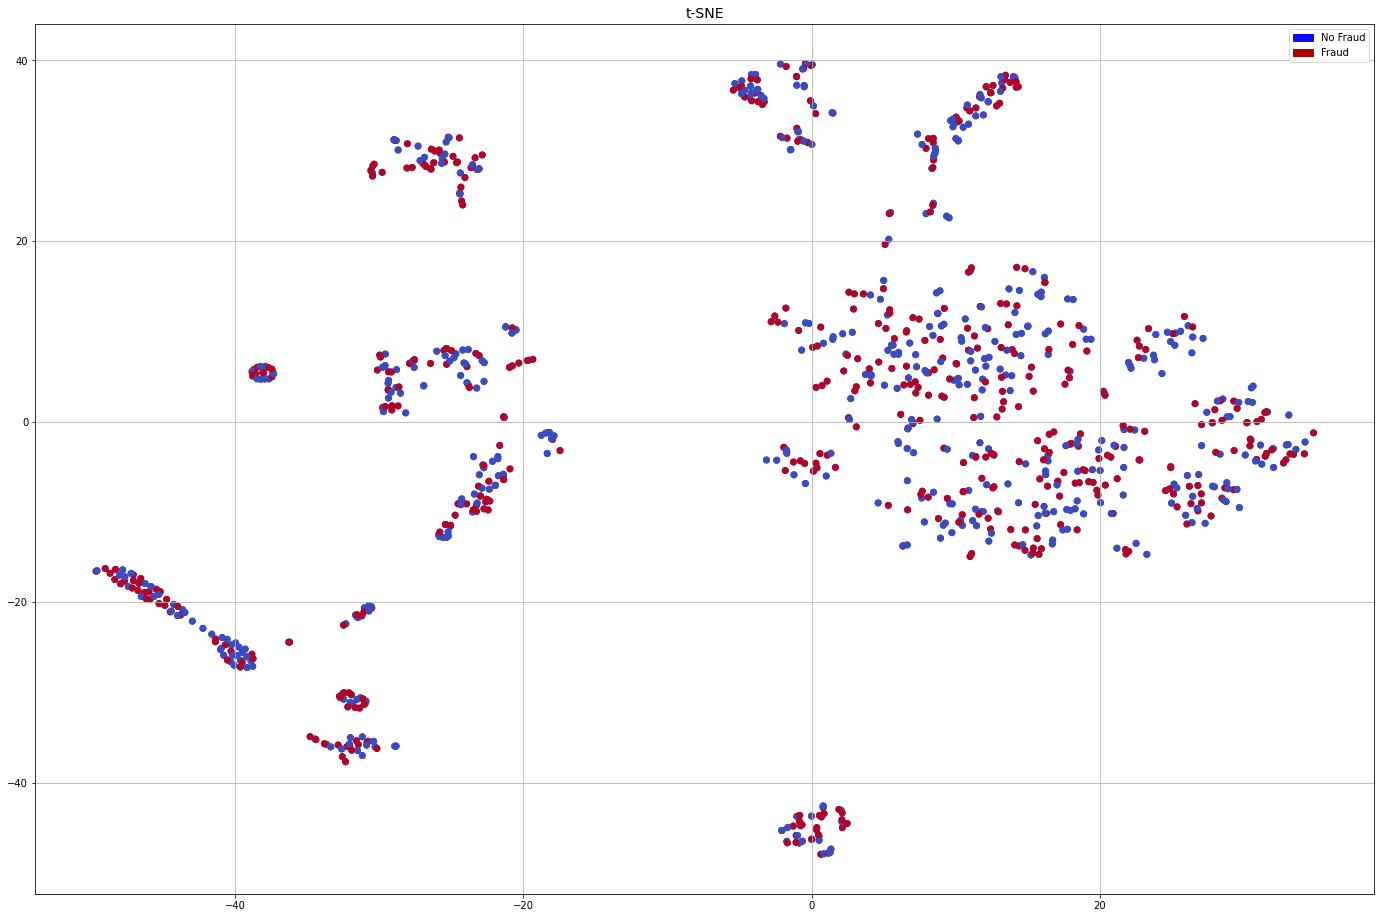

In [ ]:
# t-SNE scatter plot
f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_vis == 0), cmap='coolwarm', label='No Fraud', linewidths=1)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_vis == 1), cmap='coolwarm', label='Fraud', linewidths=1)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)
ax.legend(handles=[blue_patch, red_patch])







# Training Models



In [ ]:
# Scale "Time" and "Amount"
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,mins,hours,scaled_amount,scaled_time
163467,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,-0.638497,...,0.085934,-0.457265,0.126185,0.214236,0.067386,0,12,8,-0.282401,0.367345
211403,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,-0.250719,...,-0.045930,0.086611,0.712647,-0.066077,-0.058296,0,26,14,-0.227206,0.630928
80125,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,1.157214,...,0.194447,0.033323,-0.509168,-0.694157,-0.489850,0,12,16,-0.228184,-0.309520
126826,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,-0.234947,...,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,0,41,21,1.453224,-0.077257
8221,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,-0.002654,...,-0.104268,0.386347,-0.321959,0.002022,0.025594,0,4,3,-0.084539,-0.865118


In [ ]:
#Separating X and Y
X = df_scaled.drop(['Class', 'mins', 'hours'], axis=1)
y = df_scaled['Class']

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
163467,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,-0.638497,...,-0.321946,-0.859182,0.055476,0.085934,-0.457265,0.126185,0.214236,0.067386,-0.282401,0.367345
211403,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,-0.250719,...,0.101805,0.502895,0.007543,-0.045930,0.086611,0.712647,-0.066077,-0.058296,-0.227206,0.630928
80125,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,1.157214,...,-0.354588,-0.455957,0.074944,0.194447,0.033323,-0.509168,-0.694157,-0.489850,-0.228184,-0.309520
126826,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,-0.234947,...,0.141367,0.139091,0.226603,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,1.453224,-0.077257
8221,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,-0.002654,...,-0.050360,0.029099,-0.056541,-0.104268,0.386347,-0.321959,0.002022,0.025594,-0.084539,-0.865118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,1.205584,-0.018865,0.851469,0.271141,-0.611746,-0.355526,-0.492331,-0.082980,1.680204,-0.574047,...,-0.035527,0.212023,0.011242,0.113186,0.146389,1.059321,-0.070533,0.003090,-0.098512,-0.825068
212424,1.823779,-0.790119,-0.079887,0.486926,-0.992713,0.013298,-0.943318,0.249591,1.273188,0.203302,...,0.075700,0.139171,0.226039,-0.361329,-0.592829,0.166075,-0.015923,-0.039252,0.669042,0.636262
59004,-3.729045,-3.345294,0.504541,1.349409,2.587102,-2.875825,-1.848069,0.775216,0.299077,-1.420333,...,0.444018,-0.123563,0.036287,0.551506,-0.742764,0.095890,0.128720,-0.504839,-0.135401,-0.423513
265434,0.245442,0.757524,0.069692,-0.675437,0.834176,-0.494112,1.009999,-0.188276,-0.293707,-0.637338,...,-0.212164,-0.547161,0.116291,0.624563,-0.456012,0.097241,-0.027043,0.000804,-0.135960,0.906872


In [ ]:
y

163467    0
211403    0
80125     0
126826    0
8221      0
         ..
9693      0
212424    0
59004     0
265434    0
92081     0
Name: Class, Length: 284807, dtype: int64

# **Logistic Regression**




In [ ]:
#Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.20, random_state = 0)

In [ ]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
model.predict_proba(X_test)

array([[9.99267697e-01, 7.32302773e-04],
       [9.99988889e-01, 1.11112760e-05],
       [9.99756236e-01, 2.43764211e-04],
       ...,
       [9.99891195e-01, 1.08804720e-04],
       [9.99942084e-01, 5.79156451e-05],
       [9.99615470e-01, 3.84530456e-04]])

In [ ]:
y_predicted = model.predict(X_test)

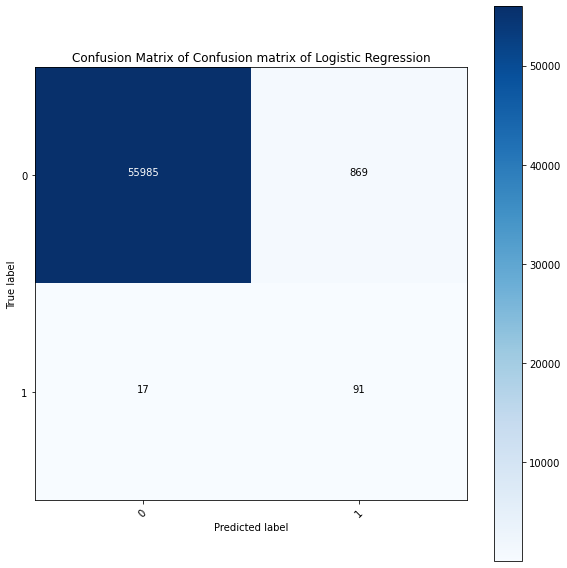

In [ ]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Logistic Regression')
plt.savefig('svm_cm_plot.png')
plt.show()

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56854
           1       0.09      0.84      0.17       108

    accuracy                           0.98     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.98      0.99     56962



ROC AUC Score: 0.9529494976737034
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56854
           1       0.09      0.84      0.17       108

    accuracy                           0.98     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.98      0.99     56962



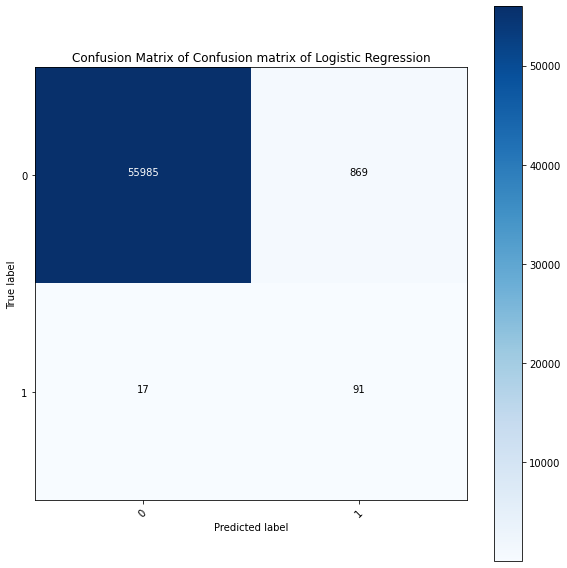

In [ ]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Logistic Regression')
plt.savefig('svm_cm_plot.png')
plt.show()


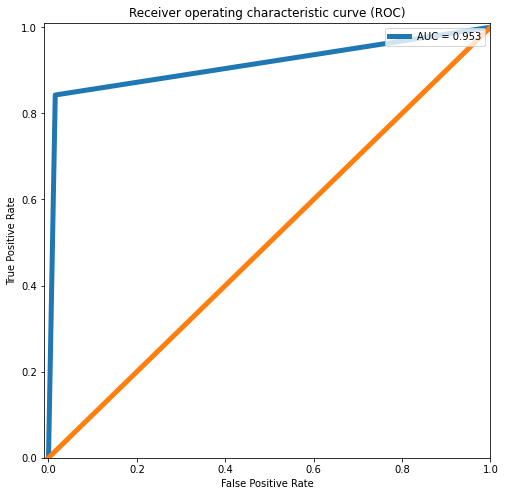

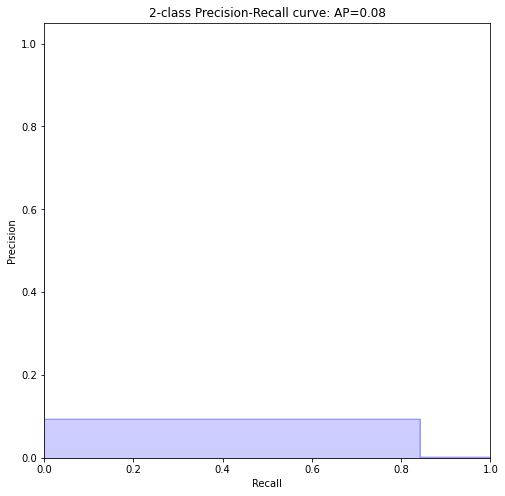

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56854
           1       0.09      0.84      0.17       108

    accuracy                           0.98     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.98      0.99     56962



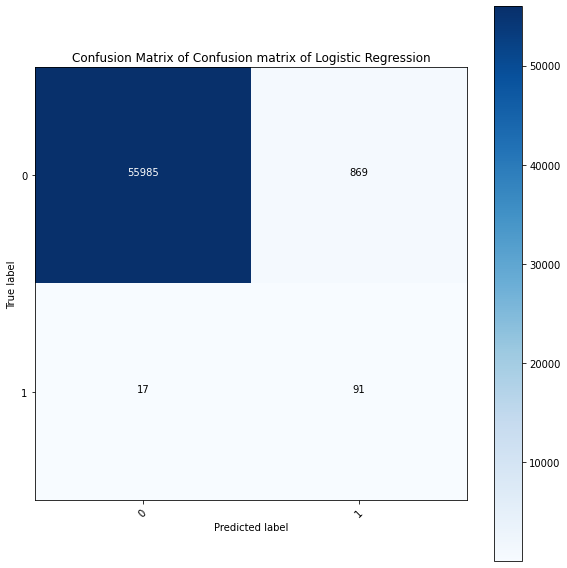

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = LogisticRegression() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Logistic Regression')
plt.savefig('svm_cm_plot.png')
plt.show()

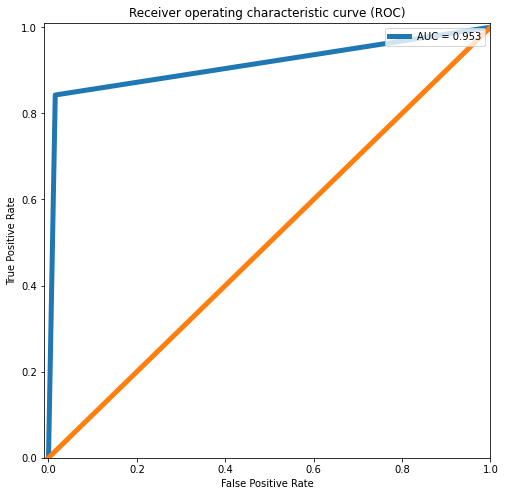

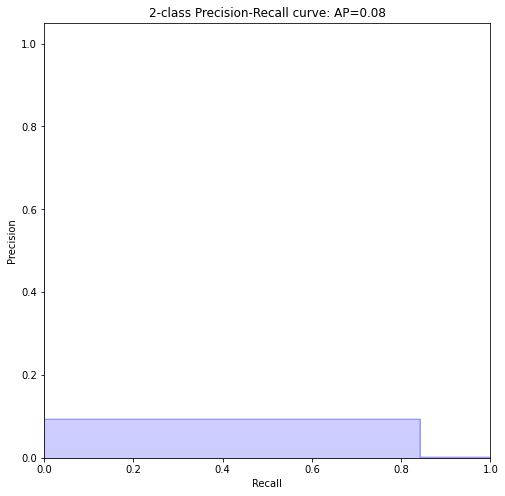

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

Training Part of Logistic Regression after removing 'V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'

In [ ]:
# Scale "Time" and "Amount"
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount','V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'],axis = 1,inplace=False)
df_scaled.head()

,V4,V5,V6,V11,V12,V13,V14,V16,V18,V19,V20,Class,mins,hours,scaled_amount,scaled_time
163467,-0.739899,1.076581,-0.251537,0.539103,-0.138719,-1.166615,-0.608435,0.628549,0.448800,0.133305,-0.041285,0,12,8,-0.282401,0.367345
211403,0.650530,-0.058817,-0.920016,0.778779,-0.075154,-2.119390,-0.606401,0.067119,0.587165,0.142988,-0.315038,0,26,14,-0.227206,0.630928
80125,1.302911,-1.550850,0.900366,0.377390,1.326861,-1.034335,-0.217089,-1.368498,-0.560265,1.398303,0.309719,0,12,16,-0.228184,-0.309520
126826,-2.280477,-0.424261,-1.015679,-0.346110,-0.435490,0.866670,-0.785313,1.756455,-1.530292,-1.088577,0.334034,0,41,21,1.453224,-0.077257
8221,-0.513938,-0.639434,-0.543843,2.576528,-2.135597,2.817757,0.225021,1.783841,-0.159246,0.534097,0.159146,0,4,3,-0.084539,-0.865118


In [ ]:
#Separating X and Y
X = df_scaled.drop(['Class', 'mins', 'hours'], axis=1)
y = df_scaled['Class']

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56854
           1       0.15      0.82      0.26       108

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962



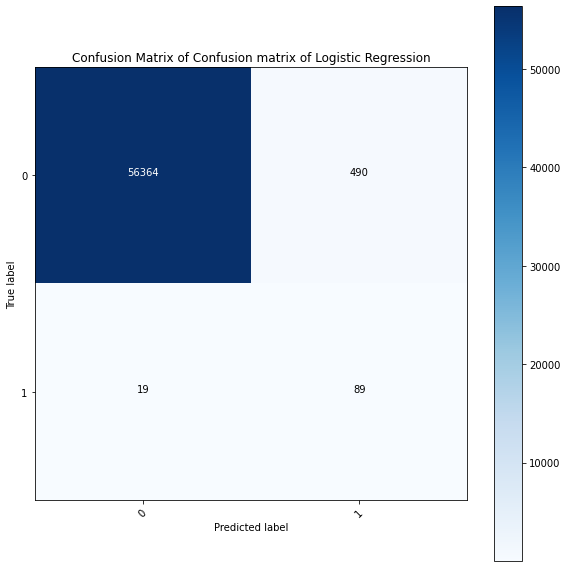

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)
# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Decision tree model
pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Logistic Regression')
plt.savefig('svm_cm_plot.png')
plt.show()

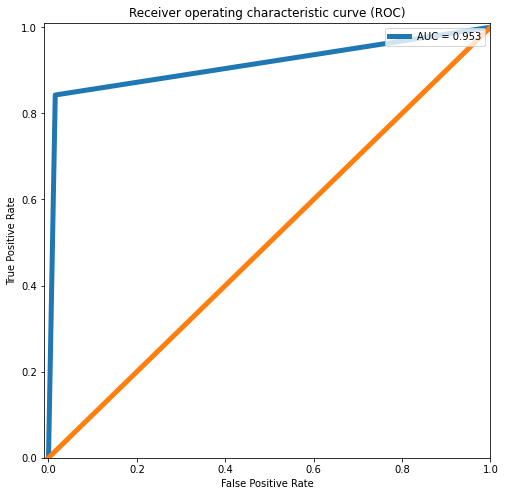

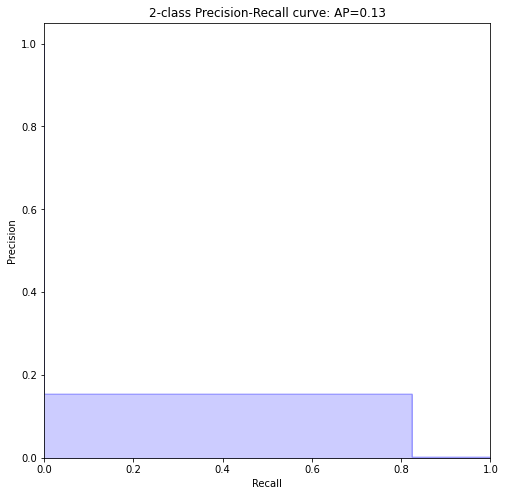

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

# Decision Tree



In [ ]:
# Scale "Time" and "Amount"
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,mins,hours,scaled_amount,scaled_time
163467,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,-0.638497,...,0.085934,-0.457265,0.126185,0.214236,0.067386,0,12,8,-0.282401,0.367345
211403,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,-0.250719,...,-0.045930,0.086611,0.712647,-0.066077,-0.058296,0,26,14,-0.227206,0.630928
80125,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,1.157214,...,0.194447,0.033323,-0.509168,-0.694157,-0.489850,0,12,16,-0.228184,-0.309520
126826,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,-0.234947,...,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,0,41,21,1.453224,-0.077257
8221,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,-0.002654,...,-0.104268,0.386347,-0.321959,0.002022,0.025594,0,4,3,-0.084539,-0.865118


In [ ]:
#Separating X and Y
X = df_scaled.drop(['Class', 'mins', 'hours'], axis=1)
y = df_scaled['Class']
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
163467,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,-0.638497,...,-0.321946,-0.859182,0.055476,0.085934,-0.457265,0.126185,0.214236,0.067386,-0.282401,0.367345
211403,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,-0.250719,...,0.101805,0.502895,0.007543,-0.045930,0.086611,0.712647,-0.066077,-0.058296,-0.227206,0.630928
80125,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,1.157214,...,-0.354588,-0.455957,0.074944,0.194447,0.033323,-0.509168,-0.694157,-0.489850,-0.228184,-0.309520
126826,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,-0.234947,...,0.141367,0.139091,0.226603,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,1.453224,-0.077257
8221,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,-0.002654,...,-0.050360,0.029099,-0.056541,-0.104268,0.386347,-0.321959,0.002022,0.025594,-0.084539,-0.865118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,1.205584,-0.018865,0.851469,0.271141,-0.611746,-0.355526,-0.492331,-0.082980,1.680204,-0.574047,...,-0.035527,0.212023,0.011242,0.113186,0.146389,1.059321,-0.070533,0.003090,-0.098512,-0.825068
212424,1.823779,-0.790119,-0.079887,0.486926,-0.992713,0.013298,-0.943318,0.249591,1.273188,0.203302,...,0.075700,0.139171,0.226039,-0.361329,-0.592829,0.166075,-0.015923,-0.039252,0.669042,0.636262
59004,-3.729045,-3.345294,0.504541,1.349409,2.587102,-2.875825,-1.848069,0.775216,0.299077,-1.420333,...,0.444018,-0.123563,0.036287,0.551506,-0.742764,0.095890,0.128720,-0.504839,-0.135401,-0.423513
265434,0.245442,0.757524,0.069692,-0.675437,0.834176,-0.494112,1.009999,-0.188276,-0.293707,-0.637338,...,-0.212164,-0.547161,0.116291,0.624563,-0.456012,0.097241,-0.027043,0.000804,-0.135960,0.906872


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.75      0.73      0.74       108

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



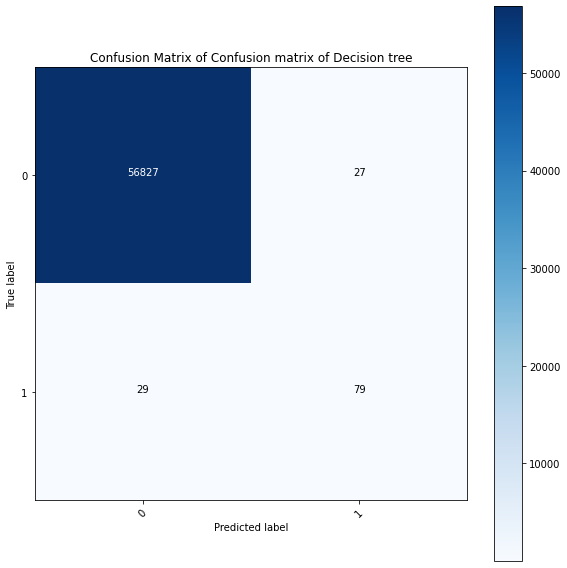

In [ ]:
# is not applied any oversampling method

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Fit a decision tree model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Decision tree')
plt.savefig('svm_cm_plot.png')
plt.show()

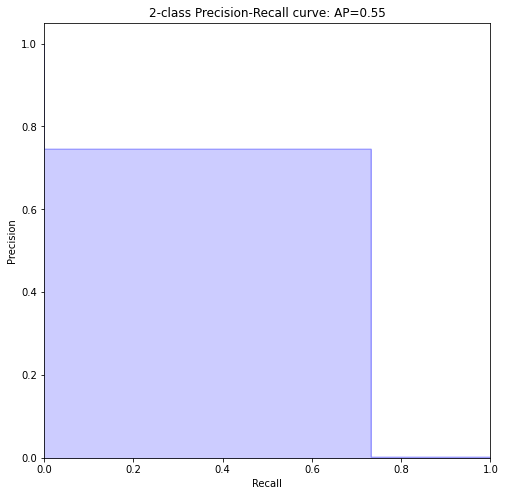

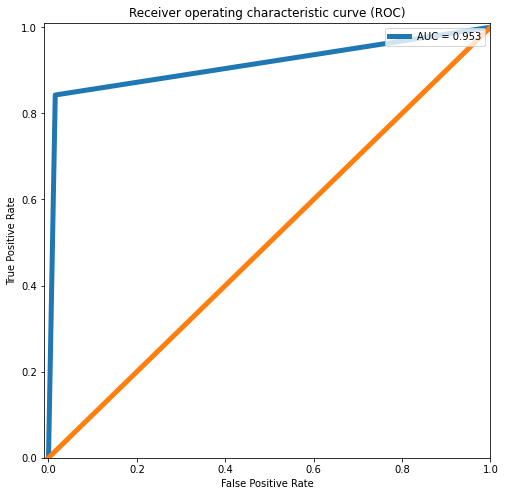

In [ ]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.40      0.73      0.52       108

    accuracy                           1.00     56962
   macro avg       0.70      0.86      0.76     56962
weighted avg       1.00      1.00      1.00     56962



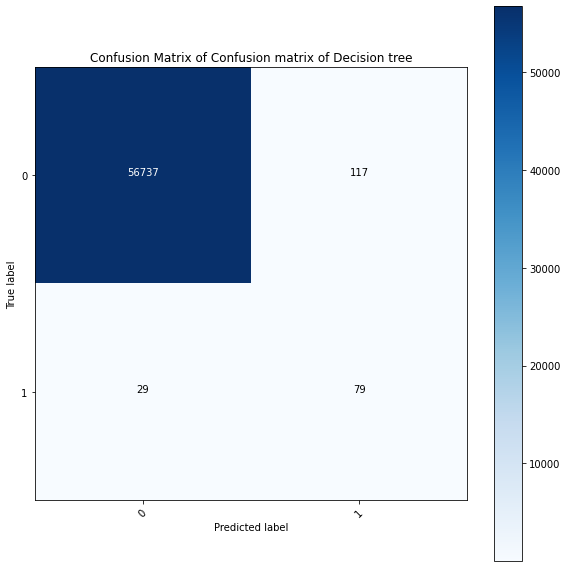

*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.57      0.73      0.64       108

    accuracy                           1.00     56962
   macro avg       0.78      0.87      0.82     56962
weighted avg       1.00      1.00      1.00     56962



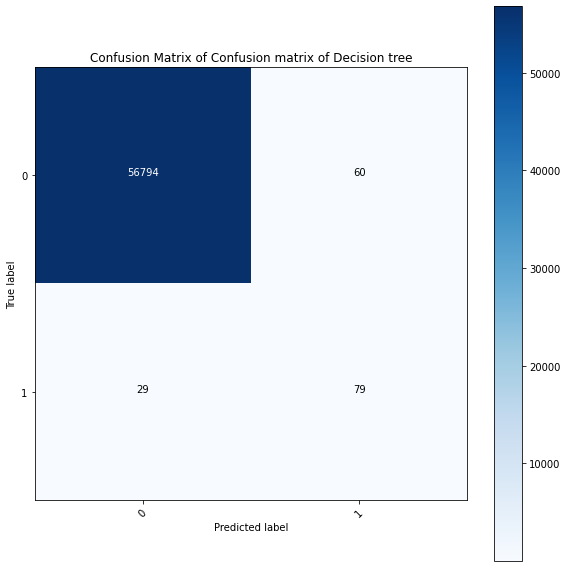

*************************


In [ ]:
#comparison of two SMOTE oversampling techniques
#since the borderline SMOTE has the best value of recall, this would be used for training the model by using a pipeline

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

# Define the resampling method
smote = SMOTE(random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

# resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_blsmote, y_train_blsmote = borderlinesmote.fit_resample(X_train,y_train)

# Fit a decision tree model to our data

smote_model = DecisionTreeClassifier().fit(X_train_smote, y_train_smote)
blsmote_model = DecisionTreeClassifier().fit(X_train_blsmote, y_train_blsmote)


y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)


print('Classifcation report:\n', classification_report(y_test, y_smote))
cm = confusion_matrix(y_test, y_smote) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Decision tree')
plt.savefig('svm_cm_plot.png')
plt.show()
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_blsmote))
cm = confusion_matrix(y_test, y_blsmote) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Decision tree')
plt.savefig('svm_cm_plot.png')
plt.show()
print('*'*25)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.70      0.72      0.71       108

    accuracy                           1.00     56962
   macro avg       0.85      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



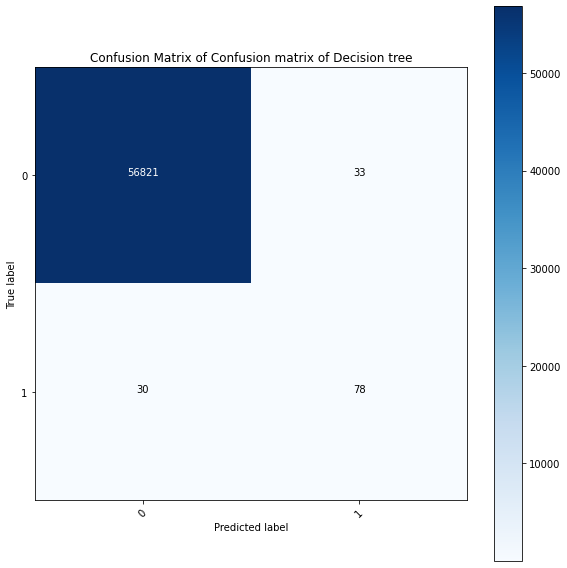

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)
# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE()
model = DecisionTreeClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Decision tree model
pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Decision tree')
plt.savefig('svm_cm_plot.png')
plt.show()

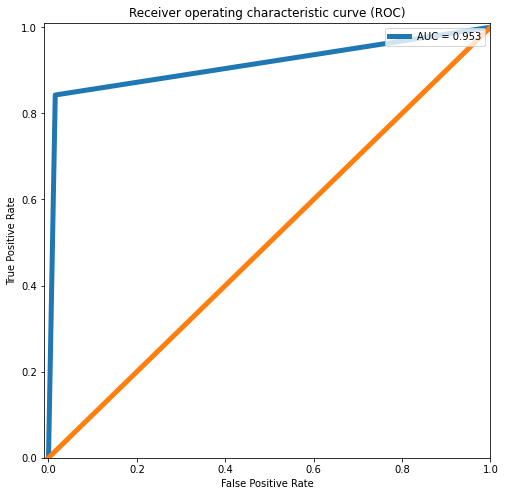

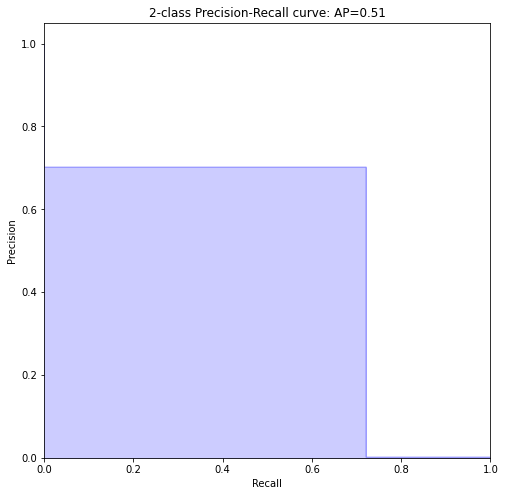

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

Training Part of Decision TREE after removing 'V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'









In [ ]:
# Scale "Time" and "Amount"
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
#df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount','V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'],axis = 1,inplace=False)
df_scaled.head()

,V4,V5,V6,V11,V12,V13,V14,V16,V18,V19,V20,Class,mins,hours,scaled_amount,scaled_time
163467,-0.739899,1.076581,-0.251537,0.539103,-0.138719,-1.166615,-0.608435,0.628549,0.448800,0.133305,-0.041285,0,12,8,-0.282401,0.367345
211403,0.650530,-0.058817,-0.920016,0.778779,-0.075154,-2.119390,-0.606401,0.067119,0.587165,0.142988,-0.315038,0,26,14,-0.227206,0.630928
80125,1.302911,-1.550850,0.900366,0.377390,1.326861,-1.034335,-0.217089,-1.368498,-0.560265,1.398303,0.309719,0,12,16,-0.228184,-0.309520
126826,-2.280477,-0.424261,-1.015679,-0.346110,-0.435490,0.866670,-0.785313,1.756455,-1.530292,-1.088577,0.334034,0,41,21,1.453224,-0.077257
8221,-0.513938,-0.639434,-0.543843,2.576528,-2.135597,2.817757,0.225021,1.783841,-0.159246,0.534097,0.159146,0,4,3,-0.084539,-0.865118


In [ ]:
#Separating X and Y
X = df_scaled.drop(['Class', 'mins', 'hours','scaled_time'], axis=1)
y = df_scaled['Class']

In [ ]:
X

,V4,V5,V6,V11,V12,V13,V14,V16,V18,V19,V20,scaled_amount
163467,-0.739899,1.076581,-0.251537,0.539103,-0.138719,-1.166615,-0.608435,0.628549,0.448800,0.133305,-0.041285,-0.282401
211403,0.650530,-0.058817,-0.920016,0.778779,-0.075154,-2.119390,-0.606401,0.067119,0.587165,0.142988,-0.315038,-0.227206
80125,1.302911,-1.550850,0.900366,0.377390,1.326861,-1.034335,-0.217089,-1.368498,-0.560265,1.398303,0.309719,-0.228184
126826,-2.280477,-0.424261,-1.015679,-0.346110,-0.435490,0.866670,-0.785313,1.756455,-1.530292,-1.088577,0.334034,1.453224
8221,-0.513938,-0.639434,-0.543843,2.576528,-2.135597,2.817757,0.225021,1.783841,-0.159246,0.534097,0.159146,-0.084539
...,...,...,...,...,...,...,...,...,...,...,...,...
9693,0.271141,-0.611746,-0.355526,0.922178,-2.097269,2.117776,1.433868,0.178439,-0.336217,-0.763692,-0.092231,-0.098512
212424,0.486926,-0.992713,0.013298,0.288016,0.237436,-1.163642,0.167894,0.983904,0.827513,0.015058,-0.134108,0.669042
59004,1.349409,2.587102,-2.875825,-0.280232,0.340369,-0.805294,-0.926441,-0.046123,-0.241728,-1.189369,0.889643,-0.135401
265434,-0.675437,0.834176,-0.494112,-0.826358,0.658776,1.151147,-0.099196,-0.107955,-0.891843,-0.102322,-0.070872,-0.135960


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56854
           1       0.07      0.82      0.13       108

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.56     56962
weighted avg       1.00      0.98      0.99     56962



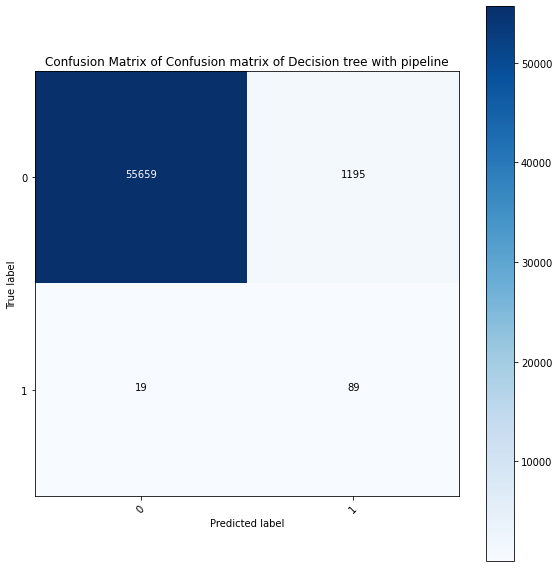

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)
# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE()
model = DecisionTreeClassifier(criterion="entropy", max_depth=4) 

# Define the pipeline, tell it to combine SMOTE with the Decision tree model
pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Decision tree with pipeline')
plt.savefig('svm_cm_plot.png')
plt.show()

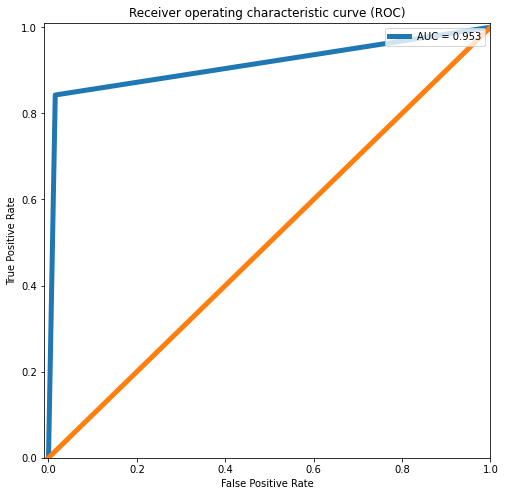

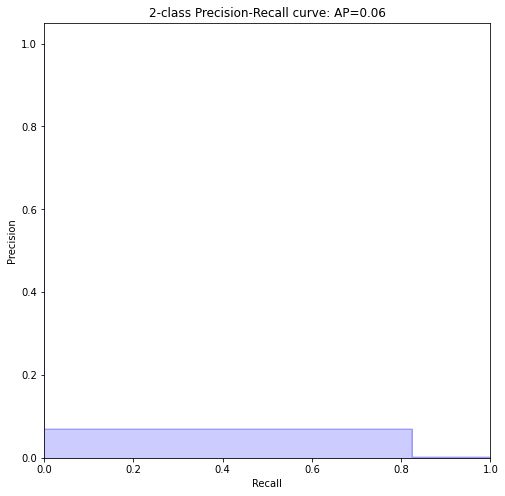

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

In [ ]:
df1=X
df1

,V4,V5,V6,V11,V12,V13,V14,V16,V18,V19,V20,scaled_amount
163467,-0.739899,1.076581,-0.251537,0.539103,-0.138719,-1.166615,-0.608435,0.628549,0.448800,0.133305,-0.041285,-0.282401
211403,0.650530,-0.058817,-0.920016,0.778779,-0.075154,-2.119390,-0.606401,0.067119,0.587165,0.142988,-0.315038,-0.227206
80125,1.302911,-1.550850,0.900366,0.377390,1.326861,-1.034335,-0.217089,-1.368498,-0.560265,1.398303,0.309719,-0.228184
126826,-2.280477,-0.424261,-1.015679,-0.346110,-0.435490,0.866670,-0.785313,1.756455,-1.530292,-1.088577,0.334034,1.453224
8221,-0.513938,-0.639434,-0.543843,2.576528,-2.135597,2.817757,0.225021,1.783841,-0.159246,0.534097,0.159146,-0.084539
...,...,...,...,...,...,...,...,...,...,...,...,...
9693,0.271141,-0.611746,-0.355526,0.922178,-2.097269,2.117776,1.433868,0.178439,-0.336217,-0.763692,-0.092231,-0.098512
212424,0.486926,-0.992713,0.013298,0.288016,0.237436,-1.163642,0.167894,0.983904,0.827513,0.015058,-0.134108,0.669042
59004,1.349409,2.587102,-2.875825,-0.280232,0.340369,-0.805294,-0.926441,-0.046123,-0.241728,-1.189369,0.889643,-0.135401
265434,-0.675437,0.834176,-0.494112,-0.826358,0.658776,1.151147,-0.099196,-0.107955,-0.891843,-0.102322,-0.070872,-0.135960


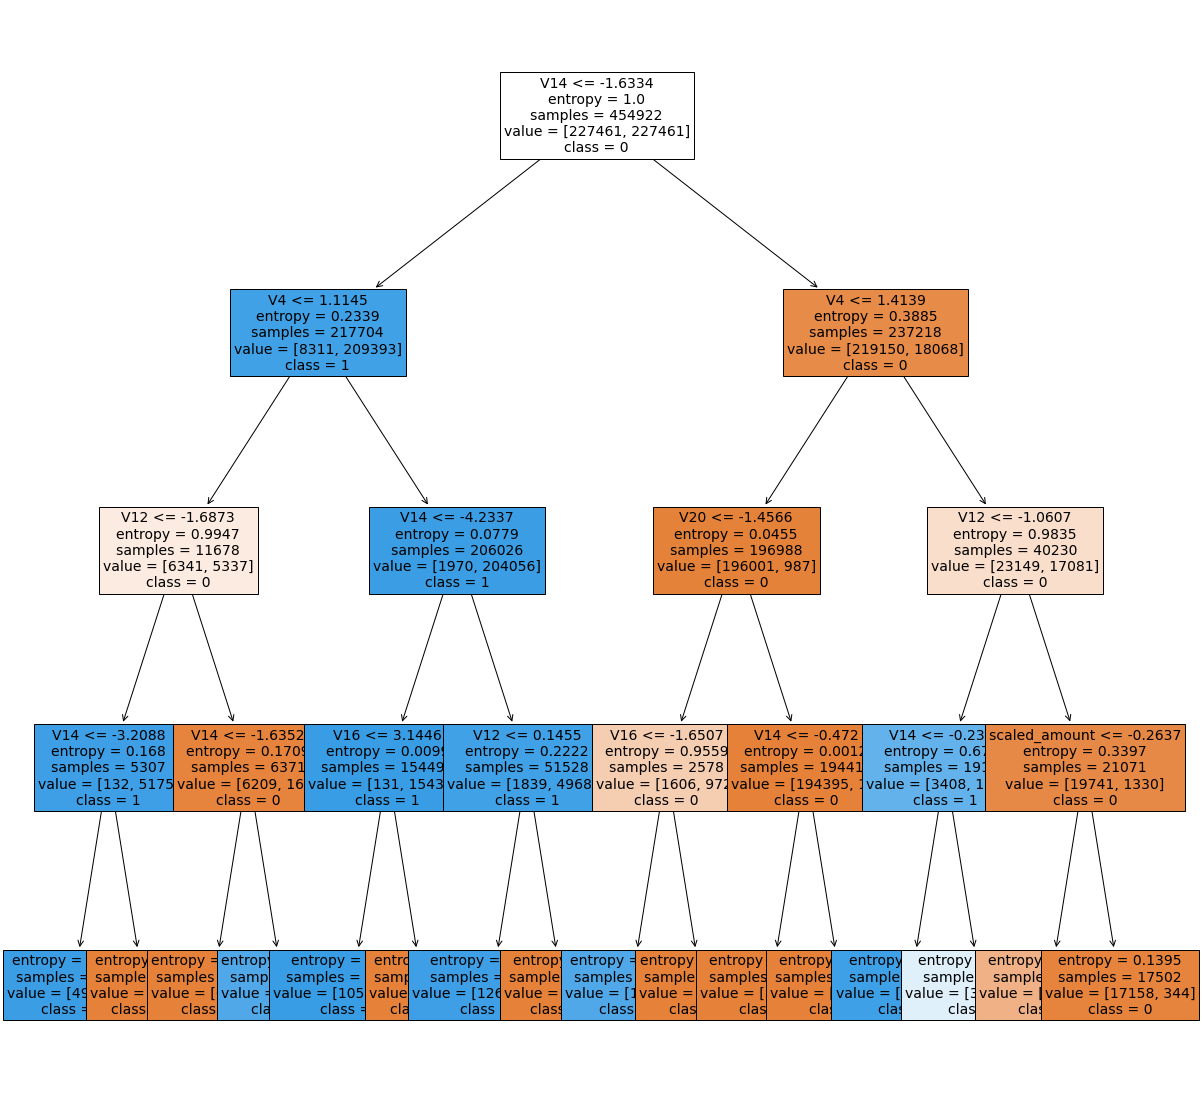

In [ ]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=model, feature_names = df1.columns, 
                   class_names =["0", "1"] , filled = True , precision = 4, fontsize=14)

**RandomForest Classifier**

In [ ]:
# Scale "Time" and "Amount"
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,mins,hours,scaled_amount,scaled_time
163467,0.122040,0.889577,-0.557672,-0.739899,1.076581,-0.251537,0.768230,0.150525,-0.109897,-0.638497,...,0.085934,-0.457265,0.126185,0.214236,0.067386,0,12,8,-0.282401,0.367345
211403,1.983664,-0.144566,-1.601533,0.650530,-0.058817,-0.920016,-0.079494,-0.052650,0.791831,-0.250719,...,-0.045930,0.086611,0.712647,-0.066077,-0.058296,0,26,14,-0.227206,0.630928
80125,-3.095610,2.341266,0.978825,1.302911,-1.550850,0.900366,-1.023949,1.546270,1.244595,1.157214,...,0.194447,0.033323,-0.509168,-0.694157,-0.489850,0,12,16,-0.228184,-0.309520
126826,-0.677805,-0.323111,1.795775,-2.280477,-0.424261,-1.015679,0.842032,-0.386281,-1.098708,-0.234947,...,0.365986,-0.261502,-0.817321,-0.108201,-0.071991,0,41,21,1.453224,-0.077257
8221,1.365524,-0.193916,0.327665,-0.513938,-0.639434,-0.543843,-0.733840,-0.151407,0.173629,-0.002654,...,-0.104268,0.386347,-0.321959,0.002022,0.025594,0,4,3,-0.084539,-0.865118


In [ ]:
#Separating X and Y
X = df_scaled.drop(['Class', 'mins', 'hours'], axis=1)
y = df_scaled['Class']


In [ ]:
#Train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.20, random_state = 0)


In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
classifier.predict_proba(X_test)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
y_pred = classifier.predict(X_test)


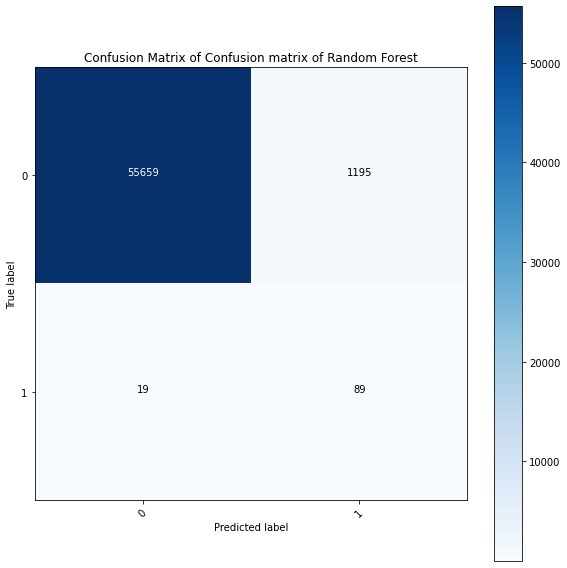

In [ ]:
# cm = confusion_matrix(y_test, y_predicted)
# plt.figure(figsize=(5,5))
# sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# all_sample_title = 'Accuracy Score: {0}'.format(classifier.score(X_test,y_test))
# plt.title(all_sample_title, size = 15)

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Random Forest')
plt.savefig('svm_cm_plot.png')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.93      0.69      0.79       108

    accuracy                           1.00     56962
   macro avg       0.96      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.82      0.78      0.80       108

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



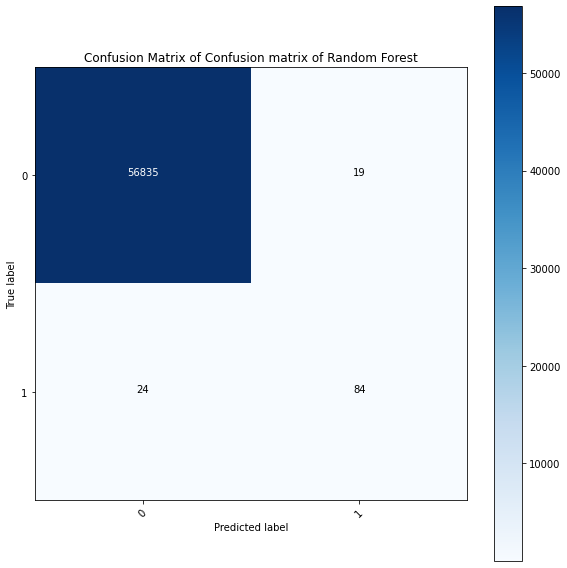

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model =  RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('RandomForest Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Random Forest')
plt.savefig('svm_cm_plot.png')
plt.show()

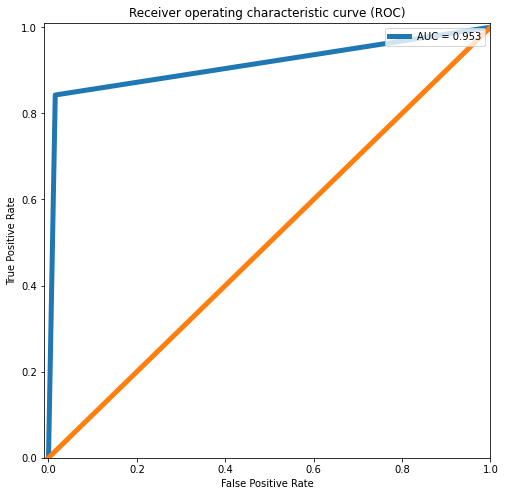

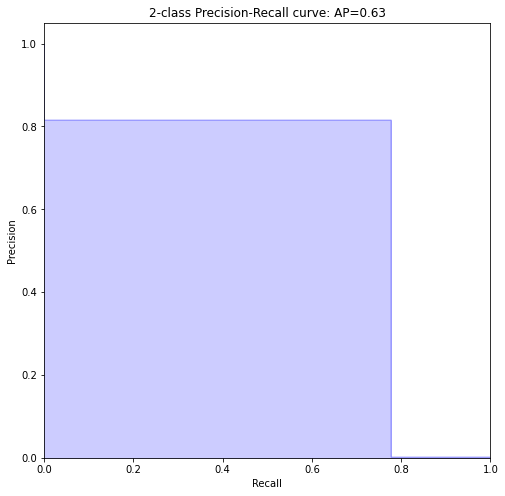

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

Training Part of Random Forest after removing 'V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'

In [ ]:
# Scale "Time" and "Amount"
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
#df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount','V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'],axis = 1,inplace=False)
df_scaled.head()

,V4,V5,V6,V11,V12,V13,V14,V16,V18,V19,V20,Class,mins,hours,scaled_amount,scaled_time
163467,-0.739899,1.076581,-0.251537,0.539103,-0.138719,-1.166615,-0.608435,0.628549,0.448800,0.133305,-0.041285,0,12,8,-0.282401,0.367345
211403,0.650530,-0.058817,-0.920016,0.778779,-0.075154,-2.119390,-0.606401,0.067119,0.587165,0.142988,-0.315038,0,26,14,-0.227206,0.630928
80125,1.302911,-1.550850,0.900366,0.377390,1.326861,-1.034335,-0.217089,-1.368498,-0.560265,1.398303,0.309719,0,12,16,-0.228184,-0.309520
126826,-2.280477,-0.424261,-1.015679,-0.346110,-0.435490,0.866670,-0.785313,1.756455,-1.530292,-1.088577,0.334034,0,41,21,1.453224,-0.077257
8221,-0.513938,-0.639434,-0.543843,2.576528,-2.135597,2.817757,0.225021,1.783841,-0.159246,0.534097,0.159146,0,4,3,-0.084539,-0.865118


In [ ]:
#Separating X and Y
X = df_scaled.drop(['Class', 'mins', 'hours'], axis=1)
y = df_scaled['Class']


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.82      0.77      0.79       108

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



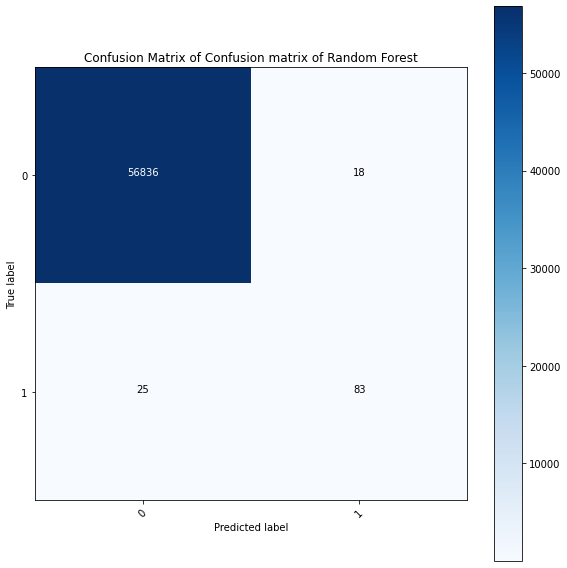

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model =  RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('RandomForest Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))

cm = confusion_matrix(y_test, y_predicted) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of Random Forest')
plt.savefig('svm_cm_plot.png')
plt.show()

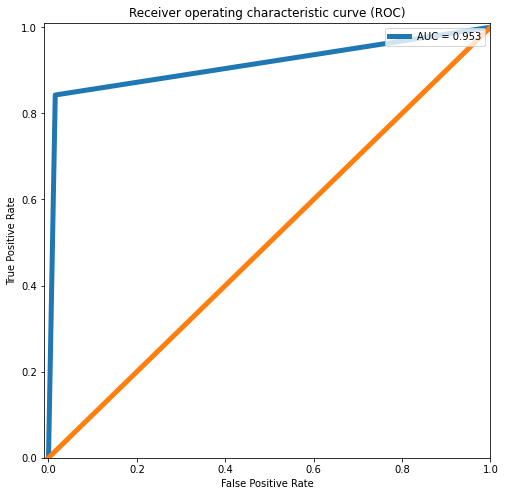

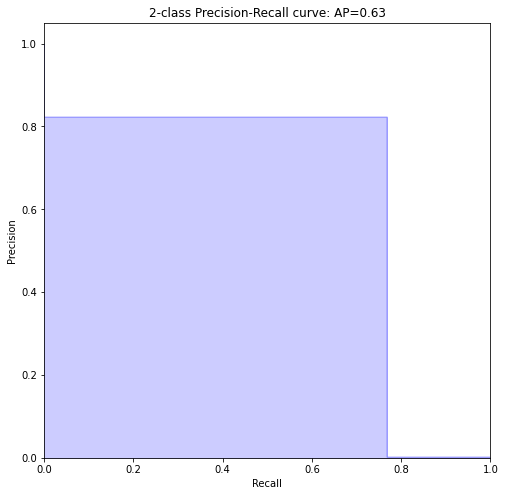

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)

# (Support Vector Machine) SVM

In [ ]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('Total number of cases are ',cases)
print('Number of Non-fraud cases are ',nonfraud_count)
print('Number of Fraud cases are ',fraud_count)
print('Percentage of fraud cases is {}',fraud_percentage)

Total number of cases are  284807
Number of Non-fraud cases are  284315
Number of Fraud cases are  492
Percentage of fraud cases is {} 0.17


In [ ]:
# DATA SPLIT
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

X = df_scaled.drop(['Class', 'mins', 'hours'], axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, svm_ypred)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, svm_ypred)

In [ ]:
print('Accuracy score of the SVM model is ',accuracy_score(y_test, svm_ypred))

Accuracy score of the SVM model is  0.9992977774656788


In [ ]:
print('F1 score of the SVM model is ',f1_score(y_test, svm_ypred))

F1 score of the SVM model is  0.7938144329896906


In [ ]:
print('Classification report:\n', classification_report(y_test, svm_ypred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56854
           1       0.90      0.71      0.79       108

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



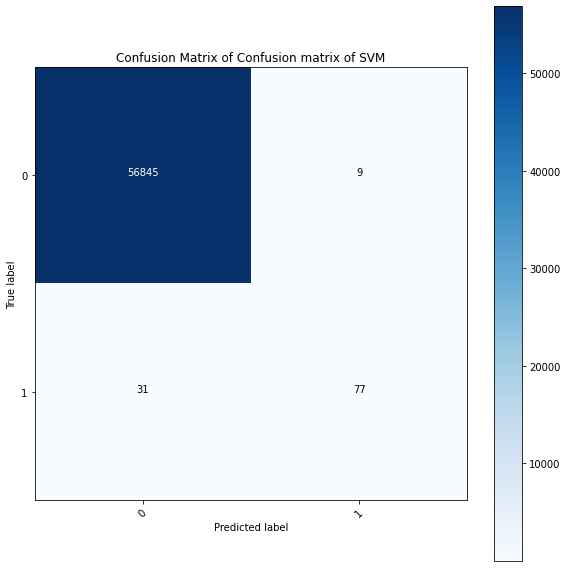

In [ ]:
cm = confusion_matrix(y_test, svm_ypred) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

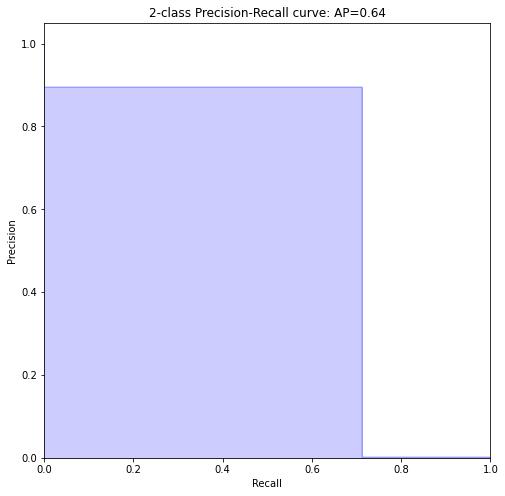

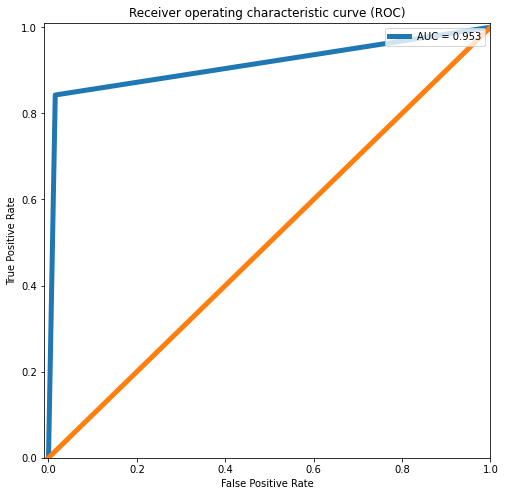

In [ ]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

Accuracy score of the SVM model is  0.9945928864857273
Classifcation report with Borderline SMOTE:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56854
           1       0.23      0.81      0.36       108

    accuracy                           0.99     56962
   macro avg       0.62      0.90      0.68     56962
weighted avg       1.00      0.99      1.00     56962



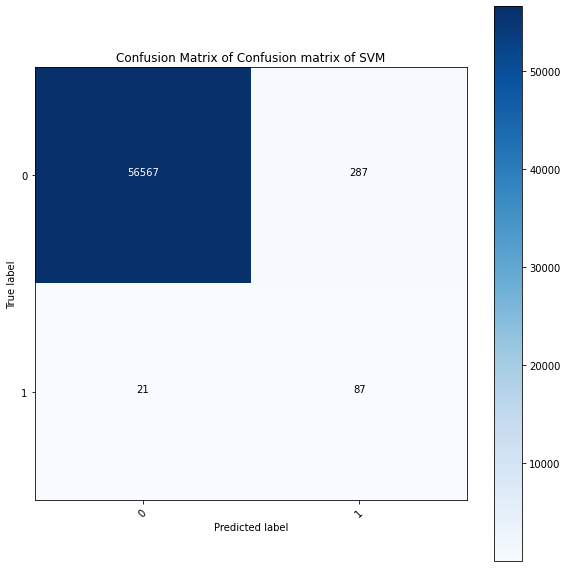

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(random_state=0)
borderline_resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) 
model = SVC() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
borderline_pipeline = Pipeline([('SMOTE', borderline_resampling), ('SVM', model)])
pipeline = Pipeline([('SMOTE', resampling), ('SVM', model)])


# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
borderline_pipeline.fit(X_train, y_train) 
svm_ypred_borderline = borderline_pipeline.predict(X_test)

print('Accuracy score of the SVM model is ', accuracy_score(y_test, svm_ypred_borderline))
print('Classifcation report with Borderline SMOTE:\n', classification_report(y_test, svm_ypred_borderline))

cm = confusion_matrix(y_test, svm_ypred_borderline) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

In [ ]:
print('Accuracy score of the SVM model is ',accuracy_score(y_test, svm_ypred_borderline))

Accuracy score of the SVM model is  0.9945928864857273


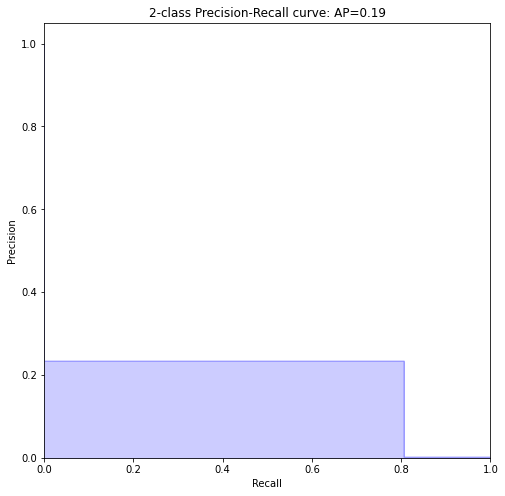

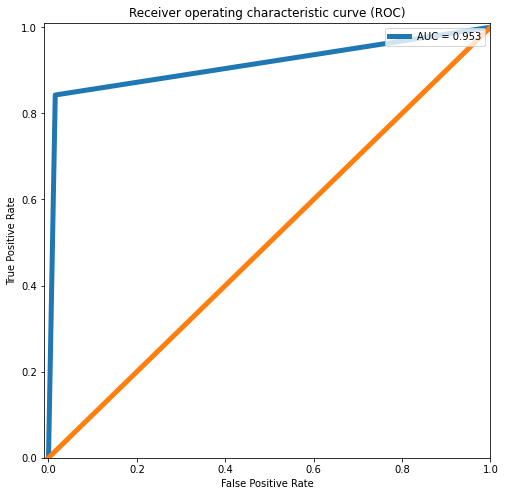

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, svm_ypred_borderline)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, svm_ypred_borderline)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

Training Part of SVM after removing 'V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'

In [ ]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount','V1','V2','V3','V7','V8','V9','V10','V15','V17','V21','V22','V23','V24','V25','V26','V27','V28'],axis = 1,inplace=False)
df_scaled.head()

X = df_scaled.drop(['Class', 'mins', 'hours'], axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Accuracy score of the SVM model is  0.9933991081773814
Classifcation report with Borderline SMOTE:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56854
           1       0.19      0.79      0.31       108

    accuracy                           0.99     56962
   macro avg       0.60      0.89      0.65     56962
weighted avg       1.00      0.99      1.00     56962



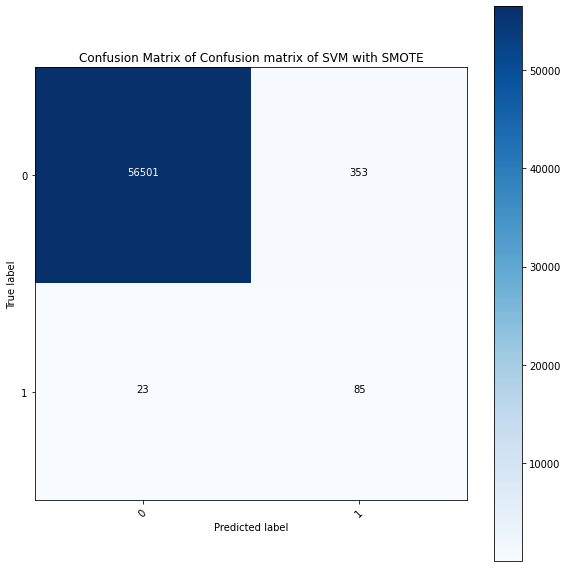

In [ ]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(random_state=0)
borderline_resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = SVC() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
borderline_pipeline = Pipeline([('SMOTE', borderline_resampling), ('SVM', model)])
pipeline = Pipeline([('SMOTE', resampling), ('SVM', model)])


# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
borderline_pipeline.fit(X_train, y_train) 
svm_ypred_borderline = borderline_pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 

print('Accuracy score of the SVM model is ',accuracy_score(y_test, svm_ypred_borderline))
print('Classifcation report with Borderline SMOTE:\n', classification_report(y_test, svm_ypred_borderline))

cm = confusion_matrix(y_test, svm_ypred_borderline) # Support Vector Machine
plt.rcParams['figure.figsize'] = (8, 8)
svm_cm_plot = plot_confusion_matrix(cm, 
                                classes = ['0','1'], 
                                normalize = False, title = 'Confusion matrix of SVM with SMOTE')
plt.savefig('svm_cm_plot.png')
plt.show()

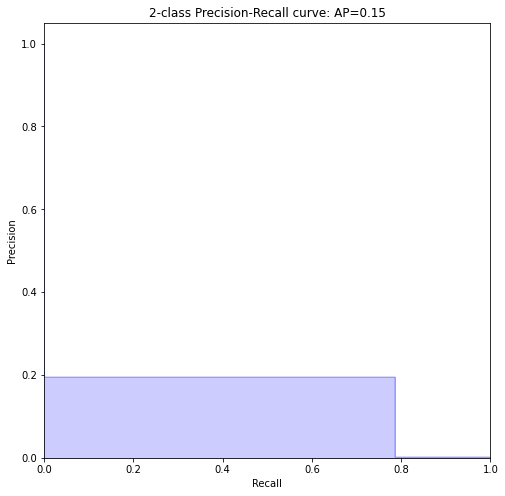

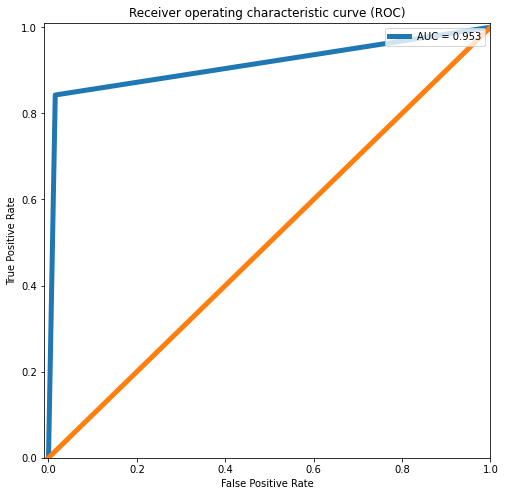

In [ ]:
# Calculate average precision 
average_precision = average_precision_score(y_test, svm_ypred_borderline)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, svm_ypred_borderline)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)